# Target Market Analysis

You have been provided with information about the customers' historical purchase as the amount of money spent, Number of inactive months and so on. Two columns `Potential_Customer` and `Cust_Last_Purchase` represent the customers' respond to the latest advertisement. The column `Potential_Customer` represents if the customer purchased any product, and the column `Cust_Last_Purchase` represents the amount of this purchase and it is `Nan` if there has been no purchase.

## Data description
- Below is the description of each feature available in the dataset.

<img src="dataset_description.png" style="height: 700px">

## Objective
**1. Design a predictive model to determine the potential customers who will purchase if you send the advertisement .** The target variable is `Potential_Customer`. 

    **Attention:** Because the column `Cust_Last_Purchase` relates to the target variable `Potential_Customer`, you need to exclude it from your model.

**2. Calculate the value and the revenue of your model.** Fit your model on train set. Assume amonge the customers on your test set we only send advertisement to those your model predicted as Class1 and we ignore the rest. From the data you can calculate the average `Cust_Last_Purchase` for those who are in the train set and had the last purchase (`Cust_Last_Purchase`>0) . Assume sending advertisement to each customer costs 5$ and the average purchase you calculated on the train set remains the same for the test set. Calculate the value of your models to choose the best model.

    - cost = advertisement_cost * number of the predicted positive
    - lost = average_purchase * number of the predicted negative but they have been positive
    - gain = average_purchase * number of the predicted positive and they have been positive
    - value = gain - lost - cost
    - revenue = gain - cost

**3. Compare your best model's revenue with the revenue of the default solution which is sending advertisement to all the customers in X_test.** Which solution would you choose?

    - cost = advertisement_cost * size of the test set
    - gain = sum(Cust_Last_Purchase) on test set
    - revenue = gain - cost
    
**4. Assume the next time you want to target a group of 30,000 customers simillar to this group. And assume the purchase rate is $10%$ which means 10 out of 100 people who receive the advertisement will purchase the product. Also assume your model will have the same Precision and Recall for Class1 .** Will you send the advertisement to everyone, or you use one of the models you have already created?

    - calculate your model's revenue on this set of 30,000 customers based on the above assumptions
    - calculate the revenue of the default model: send advertisement to everyone
         - cost = advertisement_cost * size of the test set
         - gain = average_purchase * purchase_rate
         - revenue = gain - cost
    
**Hint:**
    To calculate the revenue of a model for this new set of customers with different purchase rate we need to calculate the new confusion matrix given Precision and Recall for Class1 are fixed.

1. Perform the following:
    1. **Data Wrangling - Cleaning & Merging**: Check and handle the existance of missing values, the type of variables, or integrity of data
    2. **Exploratory Data Analysis**: Analyze data to summarize their main characteristics
    3. **Feature Engineering**: Make new features or change the current features
    4. **Feature Selection**: Choose the best features
    5. **Data Pre-Processing**: Make data usable for applying ML algorithms. 
    6. **Model Design**: Create several predictive models and tune the hyperparameters
    7. **Model Evaluation**: Compare the performance of the models
    8. **Bonus**: Any creative idea for improving machine learning models

# Table of Content

- [JDS Capstone: Target Market Analysis](#JDS-Capstone:-Target-Market-Analysis)
- [Data description](#Data-description)
- [Objective](#Objective)
- [Submission Guideline](#Submission-Guideline)
- [Presentation Guideline](#Presentation-Guideline)
- [Table of Content](#Table-of-Content)
- [0. Import necessary Packages](#0.-Import-necessary-Packages)
- [1. Load the Data into Pandas Dataframe](#1.-Load-the-Data-into-Pandas-Dataframe)
- [2. Data Cleaning](#2.-Data-Cleaning)
    - [2.1 How big is the dataset? (number of rows, features and total datapoints)](#2.1-How-big-is-the-dataset?-(number-of-rows,-features-and-total-datapoints))
    - [2.2 What is the type of each column?](#2.2-What-is-the-type-of-each-column?)
        - [2.2.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`? Fix the type of the columns as it should be.](#2.2.1-Why-columns-such-as-`Cust_Last_Purchase`-are-`object`-while-they-should-be-`float64`?-Fix-the-type-of-the-columns-as-it-should-be.)
    - [2.3 Check data for duplicate rows and remove the duplicates](#2.3-Check-data-for-duplicate-rows-and-remove-the-duplicates)
    - [2.4 Do we need `C_ID` in our analysis? Drop the columns you will not use in your analysis, if there is any.](#2.4-Do-we-need-`C_ID`-in-our-analysis?-Drop-the-columns-you-will-not-use-in-your-analysis,-if-there-is-any.)
- [3. Exploratory Data Analysis (EDA)](#3.-Exploratory-Data-Analysis-(EDA))
    - [3.1 Explore Categorical Variables](#3.2-Explore-Categorical-Variables)
        - [3.1.1 Insight](#3.1.1-Insight)
        - [3.1.2 Solution](#3.1.2-Solution)
    - [3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation](#3.2-Explore-Relationship-Between-Categorical-&-Target-Variable.-Interpret-the-observation)
        - [3.2.1. Insight](#3.2.1.-Insight)
    - [3.3 Explore Numerical Variables](#3.3-Explore-Numerical-Variables)
        - [3.3.1 Insight](#3.3.1-Insight)
    - [3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation](#3.4-Explore-the-Relationship-between-Numerical-Variables-&-Target-Variable.-Interpret-your-observation)
    - [3.5 Explore the Relationship between the columns and try to answer the following questions:](#3.5-Explore-the-Relationship-between-the-columns-and-try-to-answer-the-following-questions:)
- [4. Feature Enginearing](#4.-Feature-Enginearing)
    - [4.1 Add Some High Level Features and explore their relationship with the target variable](#4.1-Add-Some-High-Level-Features-and-explore-their-relationship-with-the-target-variable)
    - [4.2 Check Correlation between Numerical Variables](#4.2-Check-Correlation-between-Numerical-Variables)
- [5. Feature Selection](#5.-Feature-Selection)
- [6. Data PreProcessing](#6.-Data-PreProcessing)
    - [6.1 Check the Data for Missing Values](#6.1-Check-the-Data-for-Missing-Values)
    - [6.2 Separate X (features) and y (target)](#6.2-Separate-X-(features)-and-y-(target))
    - [6.3 Split data to train/test](#6.3-Split-data-to-train/test)
    - [6.4 Dummy Variables](#6.4-Dummy-Variables)
    - [6.5 Feature Scaling](#6.5-Feature-Scaling)
    - [6.6 PCA on Numerical Columns only](#6.6-PCA-on-Numerical-Columns-only)
- [7. Objective 1: Machine Learning](#7.-Objective-1:-Machine-Learning)
- [8. Objective 2](#8.-Objective-2)
- [9. Objective 3](#9.-Objective-3)
- [10. Objective 4](#10.-Objective-4)

#   0. Import necessary Packages

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import SCORERS, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#  1. Load the Data into Pandas Dataframe

In [2]:
# Load the data into data dataframe
data = pd.read_csv('../data.csv')

In [3]:
# View first 5 rows of dataframe
data.head(5).T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
C_ID,9946,87939,88003,188721,88056
Cust_Last_Purchase,$5.00,$30.00,NaN,$20.00,$5.00
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,$0.00,$25.00,$15.00,$20.00,$3.00
Pur_3_years_Avg,$7.50,$25.00,$15.00,$20.00,$4.33
Pur_5_years_Avg,$7.76,$13.00,$11.25,$12.45,$3.80


In [4]:
# View your data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Potential_Customer,4469.0,0.480868,0.499690,0.0,0.0,0.0,1.0,1.0
C_ID,4469.0,73837.719848,36156.968605,12.0,52713.0,75790.0,93705.0,191672.0
Pur_3_years,4469.0,3.297158,2.207326,0.0,2.0,3.0,4.0,15.0
Pur_5_years,4469.0,11.006042,9.459082,1.0,4.0,9.0,15.0,91.0
Pur_3_years_Indirect,4469.0,1.897516,1.629178,0.0,1.0,2.0,3.0,9.0
Pur_5_years_Indirect,4469.0,5.867756,4.939174,0.0,2.0,4.0,9.0,41.0
InAct_Last,4469.0,17.923697,4.130671,4.0,16.0,18.0,20.0,27.0
InAct_First,4469.0,73.605952,38.094688,15.0,40.0,74.0,111.0,260.0
Ad_Res_1_year,4469.0,13.070038,4.991064,3.0,11.0,12.0,13.0,49.0
Ad_Res_3_Year,4469.0,29.631237,7.787209,5.0,26.0,31.0,34.0,71.0


# 2. Data Cleaning
Checking the existance of missing values, the type of variables, or integrity of data. 

## 2.1 How big is the dataset? (number of rows, features and total datapoints)

In [5]:
data.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,$5.00,2,17,2,4,$0.00,$7.50,$7.76,...,73,3,12,16,A,0,71.0,F,H,"$65,957.00"
1,1,87939,$30.00,1,7,0,3,$25.00,$25.00,$13.00,...,55,6,6,22,A,1,7.0,M,U,$0.00
2,0,88003,NaN,5,12,3,5,$15.00,$15.00,$11.25,...,53,6,17,22,S,1,79.0,F,U,$0.00
3,1,188721,$20.00,1,11,0,3,$20.00,$20.00,$12.45,...,71,8,8,33,A,0,73.0,F,U,"$76,293.00"
4,1,88056,$5.00,3,15,2,7,$3.00,$4.33,$3.80,...,63,6,12,24,S,1,68.0,F,H,"$113,663.00"


## 2.2 What is the type of each column?

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

### 2.2.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`? Fix the type of the columns as it should be.

**Attention:** Some numerical columns have missing values, Dollar sign, or Comma. You need to fix the issue to be able to convert the column to numerical. 

**Hint:** 
1. The following code can help you to remove an 'OldSign' and replace it with a 'NewSign' or nothing: `df.col=df.col.str.replace('OldSign', 'NewSign')`

2. After removing the signs and replace it with correct sign, or nothing you need to:

    a- Create a list of the name of the categorical columns and the numerical columns:
        `CatCols=[Name of the Categorical columns]`
        `NumCols=list(set(data.columns)-set(CatCols))`
    
    b- Fix the type of the columns
        `data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))`
        `data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))`

In [7]:
# remove non-numeric characters from Cust_Last_Purchase
data['Pur_latest'] = data['Pur_latest'].str.replace('$', '').str.replace(',', '')
data['Pur_3_years_Avg'] = data['Pur_3_years_Avg'].str.replace('$', '').str.replace(',', '')
data['Pur_5_years_Avg'] = data['Pur_5_years_Avg'].str.replace('$', '').str.replace(',', '')
data['Pur_3_years_Avg_Indirect'] = data['Pur_3_years_Avg_Indirect'].str.replace('$', '').str.replace(',', '')
data['Cust_Ann_Income'] = data['Cust_Ann_Income'].str.replace('$', '').str.replace(',', '')
data['Cust_Last_Purchase'] = data['Cust_Last_Purchase'].str.replace('$', '').str.replace(',', '')


# convert Cust_Last_Purchase to float datatype
data['Cust_Last_Purchase'] = data['Cust_Last_Purchase'].astype('float64')
data['Pur_latest'] = data['Pur_latest'].astype('float64')
data['Pur_3_years_Avg'] = data['Pur_3_years_Avg'].astype('float64')
data['Pur_5_years_Avg'] = data['Pur_5_years_Avg'].astype('float64')
data['Pur_3_years_Avg_Indirect'] = data['Pur_3_years_Avg_Indirect'].astype('float64')
data['Cust_Ann_Income'] = data['Cust_Ann_Income'].astype('float64')



# create lists of categorical and numerical columns
CatCols = ['Potential_Customer', 'Status_Cust','Gender','Cust_Prop'] 
NumCols = list(data.select_dtypes(include=['float64', 'int64']).columns)

# fix datatype of columns
data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))
data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))


In [8]:
data.dtypes

Potential_Customer           float64
C_ID                         float64
Cust_Last_Purchase           float64
Pur_3_years                  float64
Pur_5_years                  float64
Pur_3_years_Indirect         float64
Pur_5_years_Indirect         float64
Pur_latest                   float64
Pur_3_years_Avg              float64
Pur_5_years_Avg              float64
Pur_3_years_Avg_Indirect     float64
InAct_Last                   float64
InAct_First                  float64
Ad_Res_1_year                float64
Ad_Res_3_Year                float64
Ad_Res_5_Year                float64
Ad_Res_Ind_1_Year            float64
Ad_Res_Ind_3_Year            float64
Ad_Res_Ind_5_Year            float64
Status_Cust                 category
Status_Latest_Ad             float64
Age                          float64
Gender                      category
Cust_Prop                   category
Cust_Ann_Income              float64
dtype: object

In [9]:
# unique Categorical Variables
data.describe(include='category')


,Status_Cust,Gender,Cust_Prop
count,4469,4469,4469
unique,6,3,2
top,A,F,H
freq,2637,2382,2477


In [10]:
# unique Numerical Variables
data.describe(include='float64')

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Latest_Ad,Age,Cust_Ann_Income
count,4469.000000,4469.000000,2149.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,...,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,3510.000000,4469.000000
mean,0.480868,73837.719848,14.654839,3.297158,11.006042,1.897516,5.867756,15.315115,14.443207,12.049447,...,73.605952,13.070038,29.631237,49.683822,5.406355,12.045872,19.496979,0.562094,59.020228,42466.925934
std,0.499690,36156.968605,11.483117,2.207326,9.459082,1.629178,4.939174,10.789029,10.196691,8.220294,...,38.094688,4.991064,7.787209,23.056042,1.361155,4.586081,8.580510,0.496185,16.902682,26756.437418
min,0.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000,...,15.000000,3.000000,5.000000,7.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,52713.000000,9.000000,2.000000,4.000000,1.000000,2.000000,10.000000,9.000000,7.500000,...,40.000000,11.000000,26.000000,31.000000,5.000000,7.000000,13.000000,0.000000,47.000000,31883.000000
50%,0.000000,75790.000000,11.000000,3.000000,9.000000,2.000000,4.000000,15.000000,13.000000,10.330000,...,74.000000,12.000000,31.000000,51.000000,6.000000,13.000000,20.000000,1.000000,60.000000,44747.000000
75%,1.000000,93705.000000,20.000000,4.000000,15.000000,3.000000,9.000000,20.000000,17.500000,15.000000,...,111.000000,13.000000,34.000000,66.000000,6.000000,16.000000,27.000000,1.000000,73.000000,57344.000000
max,1.000000,191672.000000,200.000000,15.000000,91.000000,9.000000,41.000000,250.000000,260.000000,200.000000,...,260.000000,49.000000,71.000000,157.000000,17.000000,28.000000,56.000000,1.000000,87.000000,174305.000000


## 2.3 Check data for duplicate rows and remove the duplicates

**Hint:**

1. `data.duplicated()` will give you `True` if the row in `data` is duplicate and `False` otherwise.

2. `duplicates.sum()` will tell you how many duplicates you have in `data`.

3. `data=data.drop_duplicates()` will remove the duplicates

In [11]:
duplicates = data.duplicated()

In [12]:
duplicates.sum()

851

In [13]:
data = data.drop_duplicates()

In [14]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3613    False
3614    False
3615    False
3616    False
3617    False
Length: 3618, dtype: bool

## 2.4 Do we need `C_ID` in our analysis? Drop the columns you will not use in your analysis, if there is any.

**Hint:** 
1. Drop the useless column(s)
2. Remove the name of the column(s) from `CatCols` or `NumCols`
    Example: CatCols.remove('C_ID')

In [85]:
NumCols

['Potential_Customer',
 'C_ID',
 'Cust_Last_Purchase',
 'Pur_3_years',
 'Pur_5_years',
 'Pur_3_years_Indirect',
 'Pur_5_years_Indirect',
 'Pur_latest',
 'Pur_3_years_Avg',
 'Pur_5_years_Avg',
 'Pur_3_years_Avg_Indirect',
 'InAct_Last',
 'InAct_First',
 'Ad_Res_1_year',
 'Ad_Res_3_Year',
 'Ad_Res_5_Year',
 'Ad_Res_Ind_1_Year',
 'Ad_Res_Ind_3_Year',
 'Ad_Res_Ind_5_Year',
 'Status_Latest_Ad',
 'Age',
 'Cust_Ann_Income']

In [15]:
# drop C_ID column
data = data.drop('C_ID', axis=1)

# remove C_ID from NumCols
NumCols.remove('C_ID')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        3618 non-null   float64 
 1   Cust_Last_Purchase        1736 non-null   float64 
 2   Pur_3_years               3618 non-null   float64 
 3   Pur_5_years               3618 non-null   float64 
 4   Pur_3_years_Indirect      3618 non-null   float64 
 5   Pur_5_years_Indirect      3618 non-null   float64 
 6   Pur_latest                3618 non-null   float64 
 7   Pur_3_years_Avg           3618 non-null   float64 
 8   Pur_5_years_Avg           3618 non-null   float64 
 9   Pur_3_years_Avg_Indirect  2956 non-null   float64 
 10  InAct_Last                3618 non-null   float64 
 11  InAct_First               3618 non-null   float64 
 12  Ad_Res_1_year             3618 non-null   float64 
 13  Ad_Res_3_Year             3618 non-null   float6

# 3. Exploratory Data Analysis (EDA)
    
Checking the relationship betweem variables, summary of data, outliers, filling missing values etc.
**If the ultimate goal is designing predictive models on the data, and we use EDA as part of the proprocessing, we are NOT allowed to do EDA on the test set.** However, if you only do EDA to get business insight from the data, you **CAN** use the whole data, if you don't use that insight for data preprocessing such as data cleaning.
    
**Example:** To impute the missing values by mean/median, we calculate the mean or the median on the Train set only and then we impute the missing values by that mean/median on both Train and Test data.

## 3.1 Explore Categorical Variables
1. How many categories in each categorical variables?
2. What proportion/percentage from each category?

**Hint:**
For visualization you can use `sns.countplot()` for each categorical variable


In [17]:
data.head()


,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1.0,5.0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.50,...,73.0,3.0,12.0,16.0,A,0.0,71.0,F,H,65957.0
1,1.0,30.0,1.0,7.0,0.0,3.0,25.0,25.00,13.00,NaN,...,55.0,6.0,6.0,22.0,A,1.0,7.0,M,U,0.0
2,0.0,NaN,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,...,53.0,6.0,17.0,22.0,S,1.0,79.0,F,U,0.0
3,1.0,20.0,1.0,11.0,0.0,3.0,20.0,20.00,12.45,NaN,...,71.0,8.0,8.0,33.0,A,0.0,73.0,F,U,76293.0
4,1.0,5.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,...,63.0,6.0,12.0,24.0,S,1.0,68.0,F,H,113663.0


In [18]:
data.describe(include='category')

,Status_Cust,Gender,Cust_Prop
count,3618,3618,3618
unique,6,3,2
top,A,F,H
freq,2146,1922,1981


In [19]:
data.head()
data.describe(include='category')

,Status_Cust,Gender,Cust_Prop
count,3618,3618,3618
unique,6,3,2
top,A,F,H
freq,2146,1922,1981


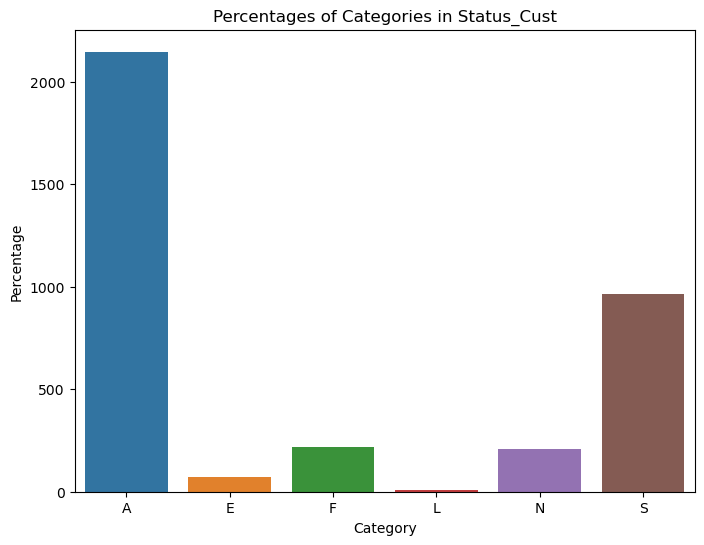

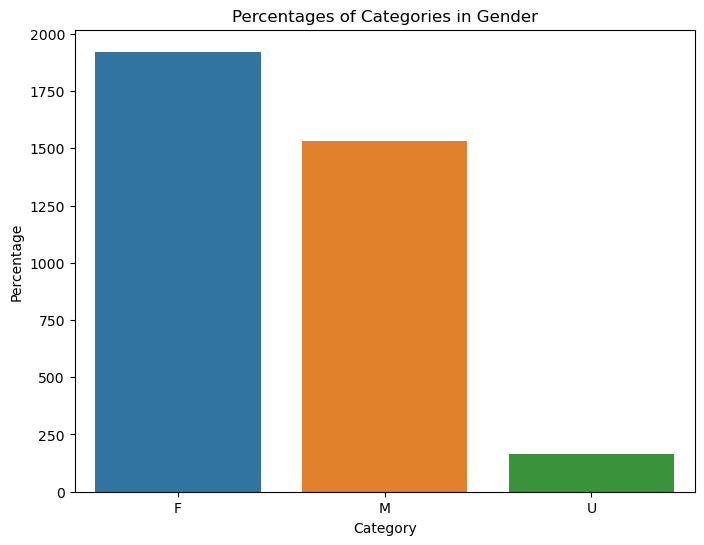

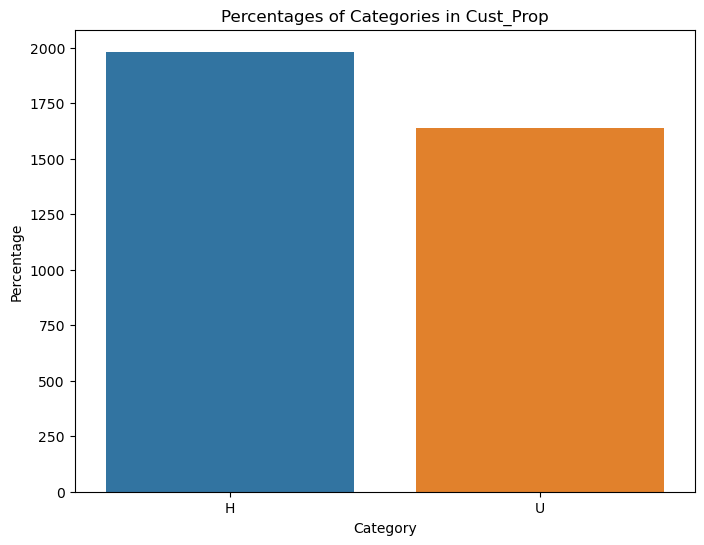

In [20]:
cat_vars = ['Status_Cust', 'Gender', 'Cust_Prop']

for var in cat_vars:
    counts = data[var].value_counts()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts.index, y=counts.values)
    plt.title('Percentages of Categories in ' + var)
    plt.xlabel('Category')
    plt.ylabel('Percentage')
    plt.show()


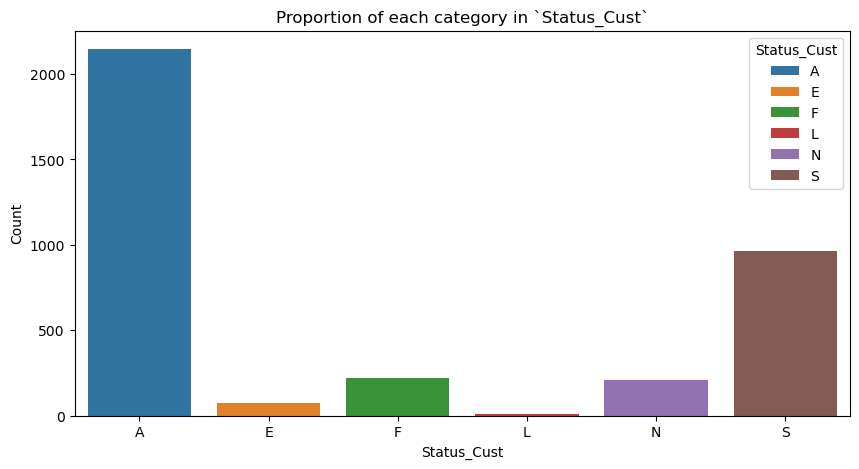

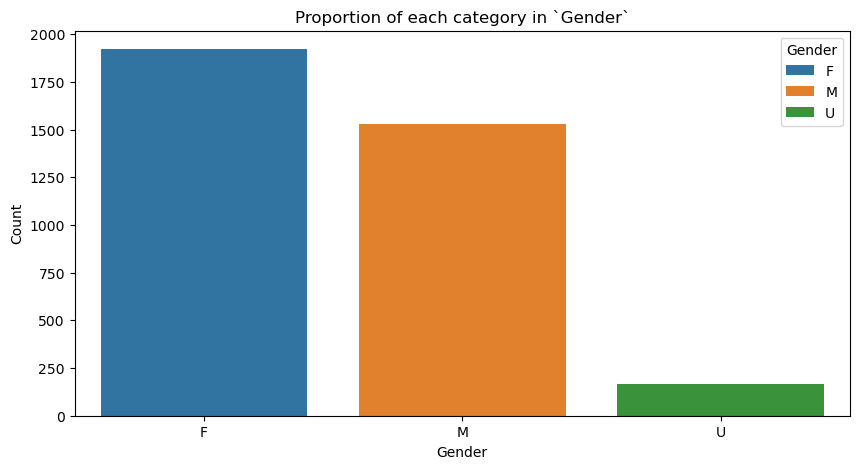

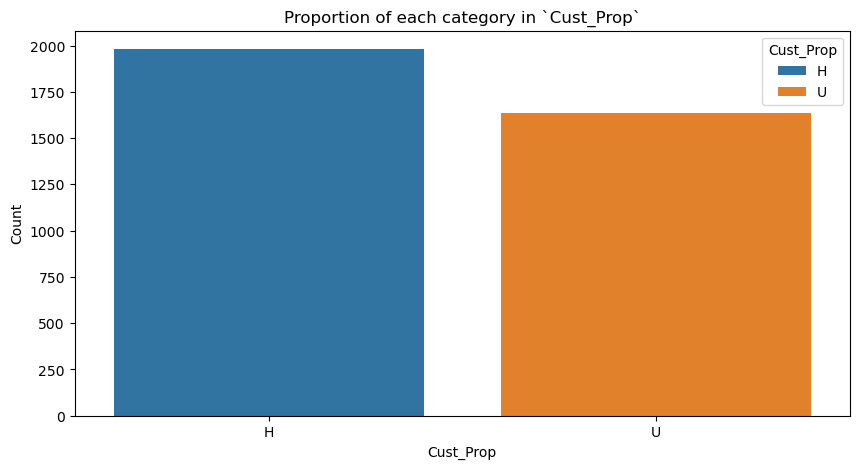

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot proportion of each category in `Status_Cust`
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Status_Cust', hue='Status_Cust', dodge=False)
plt.title('Proportion of each category in `Status_Cust`')
plt.ylabel('Count')
plt.show()

# Plot proportion of each category in `Gender`
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Gender', hue='Gender', dodge=False)
plt.title('Proportion of each category in `Gender`')
plt.ylabel('Count')
plt.show()

# Plot proportion of each category in `Cust_Prop`
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Cust_Prop', hue='Cust_Prop', dodge=False)
plt.title('Proportion of each category in `Cust_Prop`')
plt.ylabel('Count')
plt.show()

### 3.1.1 Insight

In [ ]:
print('Combine categories in Status_Cust counts that is too small')
print('Drop Unknown in Gender for better visualization')

### 3.1.2 Solution

In [ ]:
mapper = { 'A':'A', 'S':'S', 'E':'Other','F':'Other','N':'Other','L':'Other'}
data['Status_Cust_New'] = data['Status_Cust'].replace(mapper)
CatCols = CatCols + ['Status_Cust_New']
CatCols.remove('Status_Cust')

## 3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation

**Hint**: 
1. Create list of the categorical features:
    `CatFes=list(set(CatCols)-set(['Potential_Customer']))`

2. use `sns.countplot()` to create subplots for each categorical feature and hue=`data.Potential_Customer` to assign color to the plot based on the target variable `Potential_Customer`

In [22]:
CatFes=list(set(CatCols)-set(['Potential_Customer']))
CatFes

['Cust_Prop', 'Status_Cust', 'Gender']

### 3.2.1. Insight

In [ ]:
print('we can relate Potential_Customer with Status_Latest_Ad as potential customer increase after seeing the latest ad')

## 3.3 Explore Numerical Variables

**Hint**: use `sns.distplot()` and `sns.boxplot()`

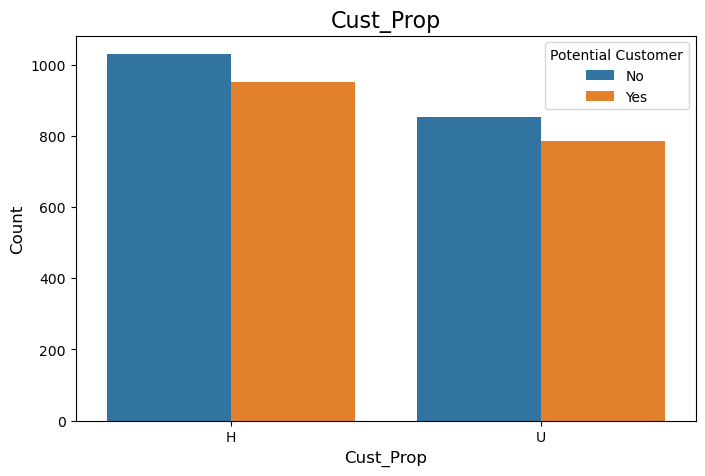

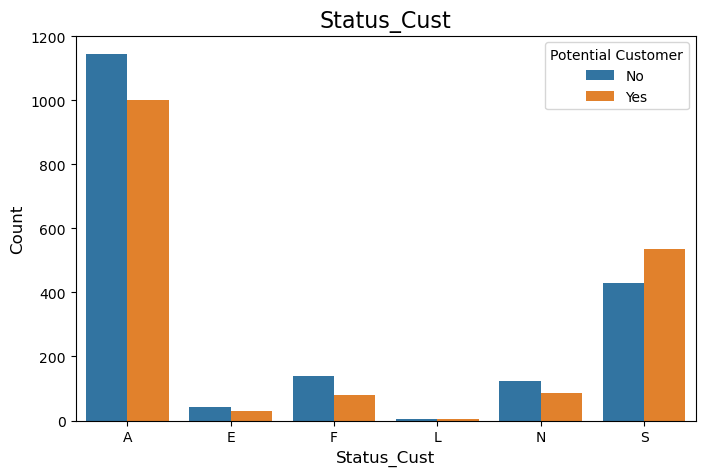

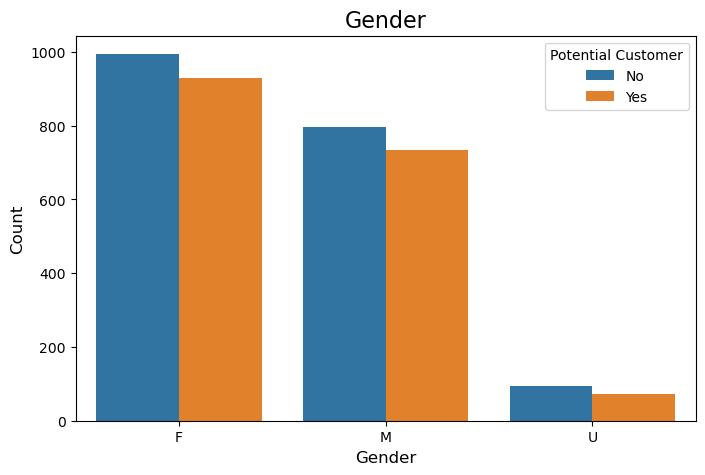

In [23]:
for cat in CatFes:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=data, x=cat, hue="Potential_Customer")
    ax.set_title(cat, fontsize=16)
    ax.set_xlabel(cat, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.legend(title="Potential Customer", loc='upper right', labels=["No", "Yes"])
    plt.show()

## 3.3 Explore Numerical Variables

**Hint**: use `sns.distplot()` and `sns.boxplot()`

In [24]:
data.describe(include='float64')

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Latest_Ad,Age,Cust_Ann_Income
count,3618.000000,1736.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,2956.000000,...,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,2825.000000,3618.000000
mean,0.479823,14.557748,3.308734,11.018795,1.909066,5.887507,15.267344,14.309536,11.913532,13.582128,...,73.807352,13.031786,29.598673,49.613875,5.403814,12.064400,19.508292,0.568546,59.018761,41608.894417
std,0.499662,11.566174,2.185492,9.405537,1.624995,4.904147,10.794970,10.060256,8.046675,9.729153,...,38.127214,4.941665,7.728158,22.864578,1.356644,4.569374,8.547971,0.495348,16.900077,26127.991993
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.750000,...,15.000000,3.000000,5.000000,7.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,2.000000,4.000000,1.000000,2.000000,10.000000,9.000000,7.500000,8.000000,...,40.000000,11.000000,26.000000,31.000000,5.000000,8.000000,13.000000,0.000000,47.000000,31385.750000
50%,0.000000,11.000000,3.000000,9.000000,2.000000,5.000000,15.000000,13.000000,10.295000,11.670000,...,74.000000,12.000000,31.000000,50.000000,6.000000,13.000000,20.000000,1.000000,60.000000,44284.500000
75%,1.000000,20.000000,4.000000,15.000000,3.000000,9.000000,20.000000,17.500000,14.787500,16.670000,...,111.000000,13.000000,33.000000,66.000000,6.000000,16.000000,27.000000,1.000000,73.000000,56508.000000
max,1.000000,200.000000,15.000000,91.000000,9.000000,41.000000,250.000000,260.000000,200.000000,260.000000,...,260.000000,49.000000,71.000000,157.000000,17.000000,28.000000,56.000000,1.000000,87.000000,174305.000000


In [25]:
NumCols

['Potential_Customer',
 'Cust_Last_Purchase',
 'Pur_3_years',
 'Pur_5_years',
 'Pur_3_years_Indirect',
 'Pur_5_years_Indirect',
 'Pur_latest',
 'Pur_3_years_Avg',
 'Pur_5_years_Avg',
 'Pur_3_years_Avg_Indirect',
 'InAct_Last',
 'InAct_First',
 'Ad_Res_1_year',
 'Ad_Res_3_Year',
 'Ad_Res_5_Year',
 'Ad_Res_Ind_1_Year',
 'Ad_Res_Ind_3_Year',
 'Ad_Res_Ind_5_Year',
 'Status_Latest_Ad',
 'Age',
 'Cust_Ann_Income']

### 3.3.1 Insight

In [ ]:
print('graph skewed to zero and too many outliers')
print('need further improvement in cleaning the data')

## 3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation

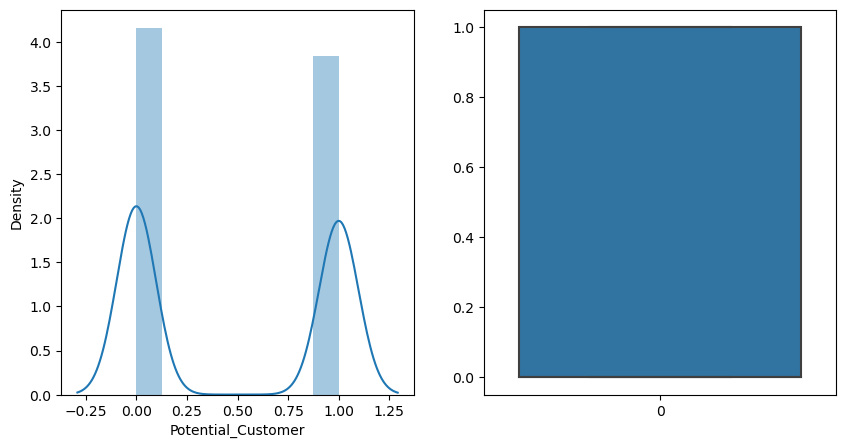

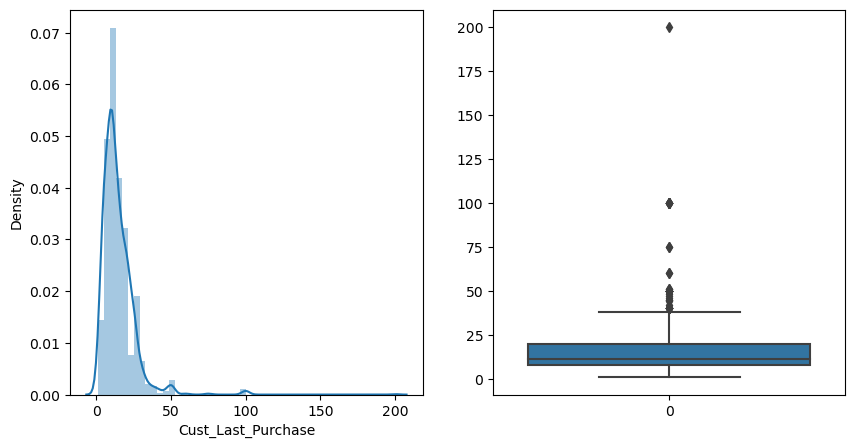

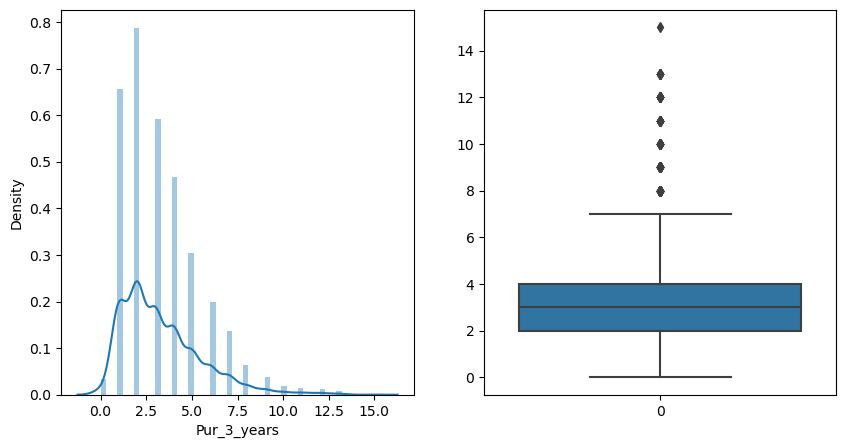

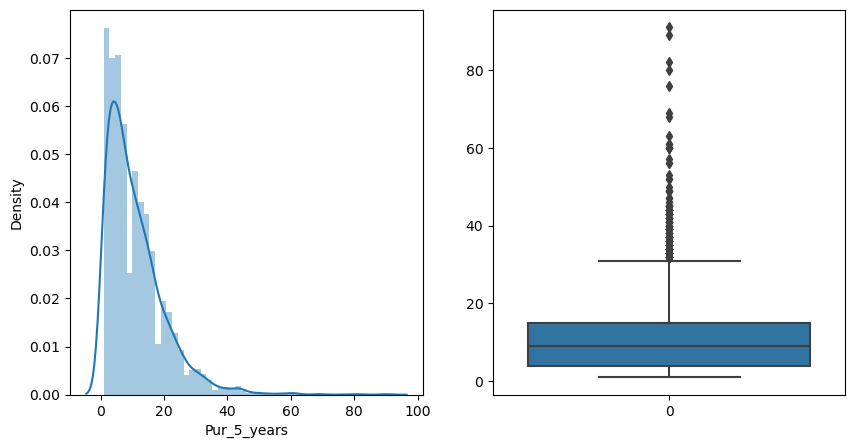

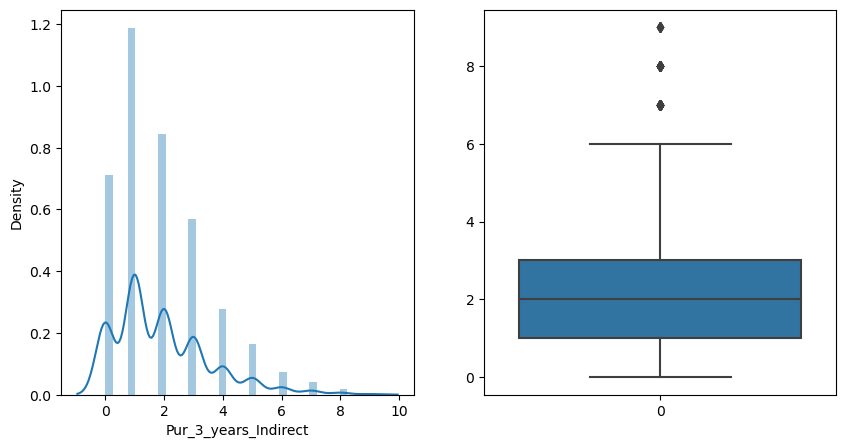

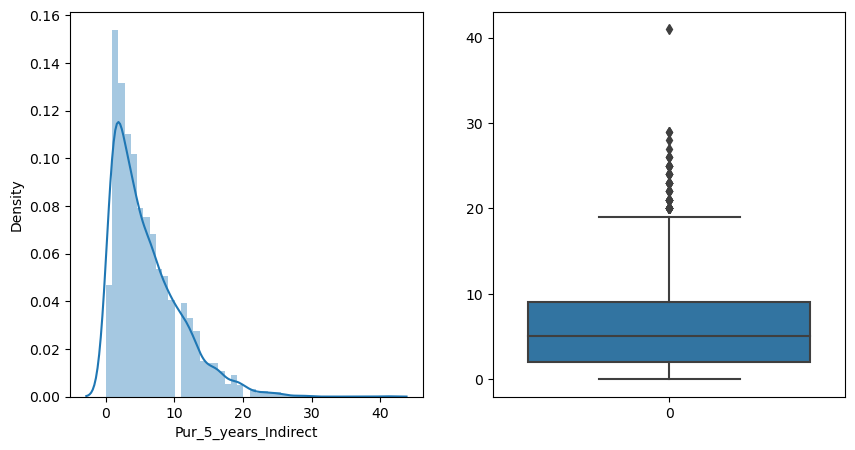

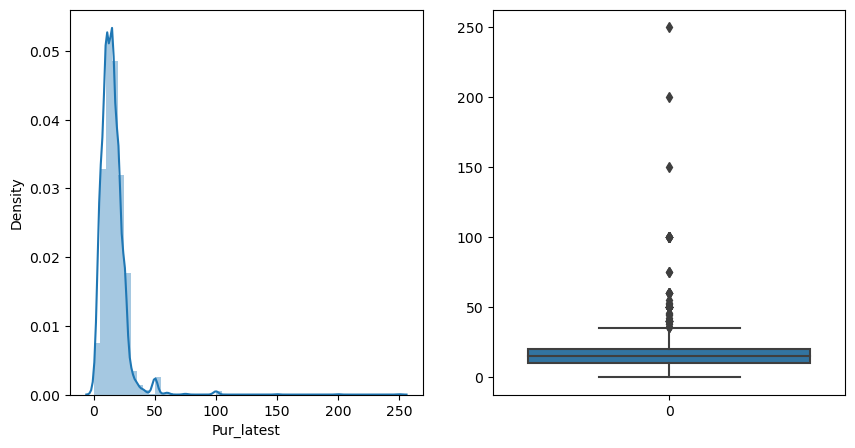

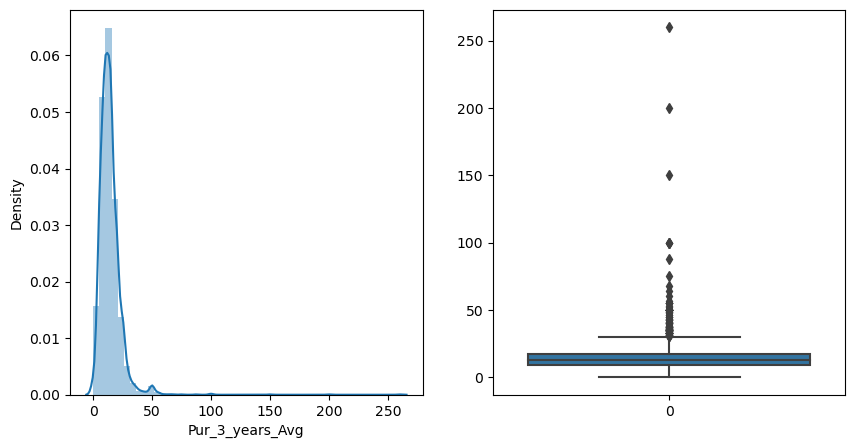

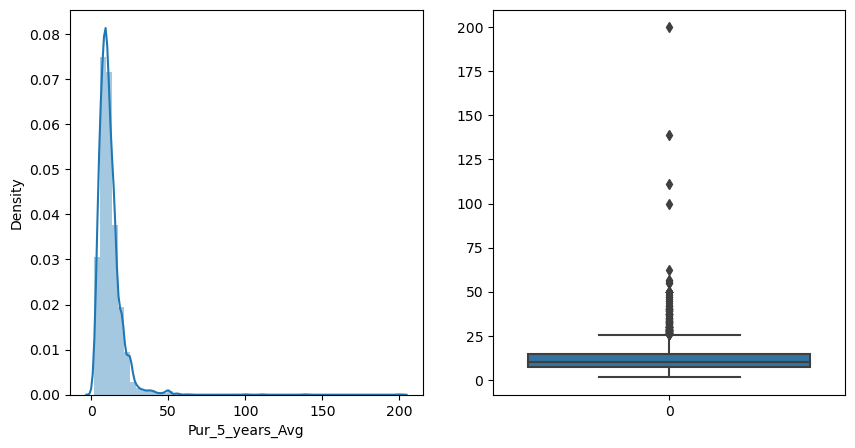

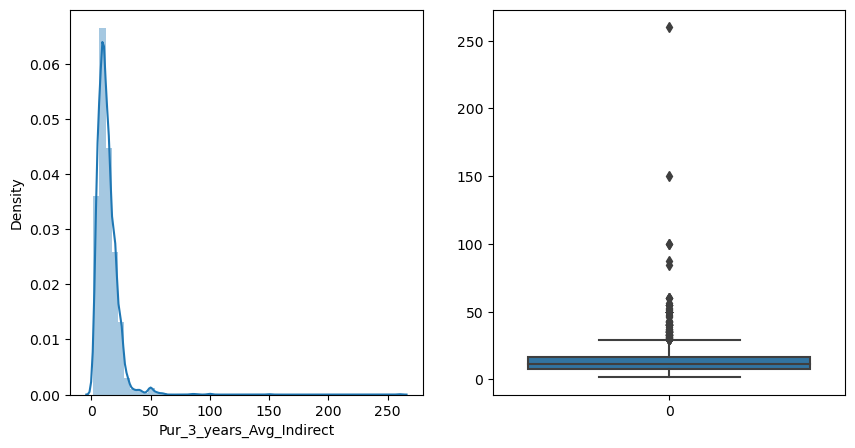

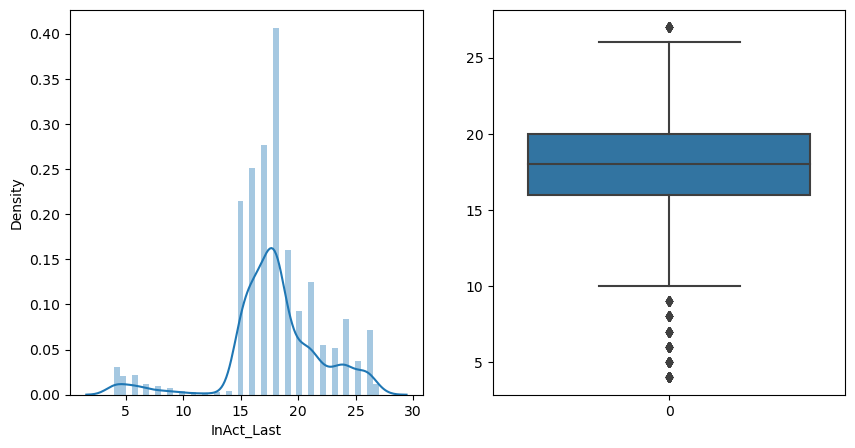

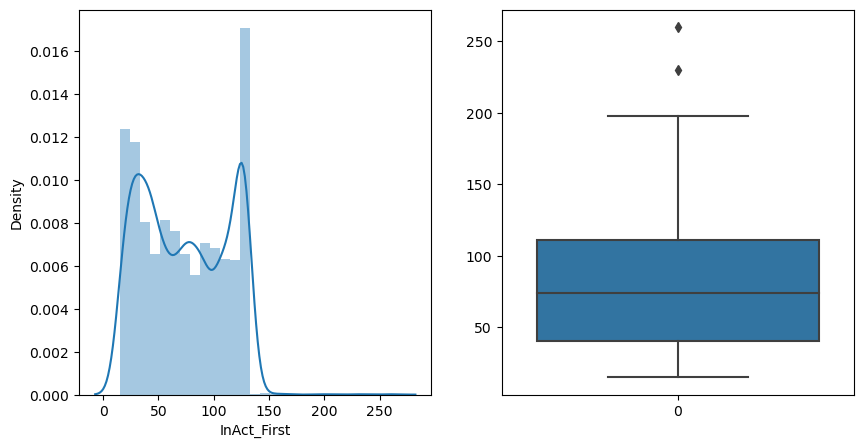

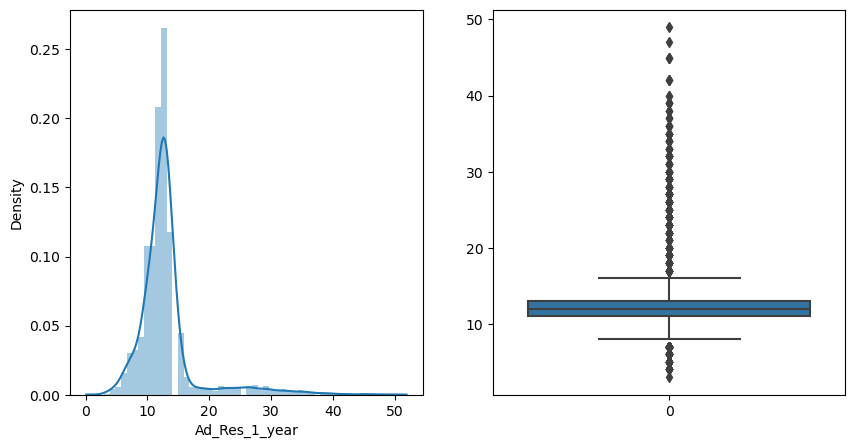

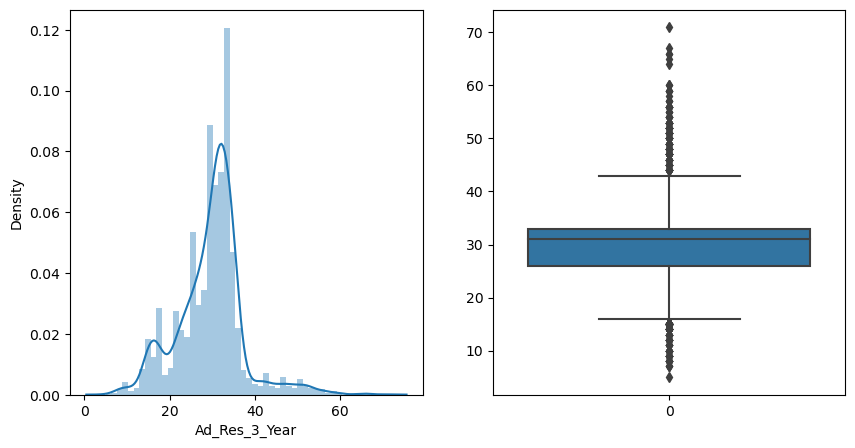

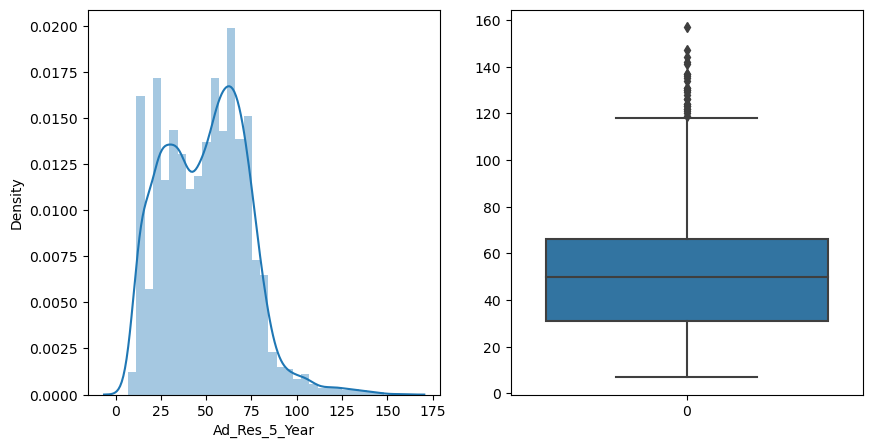

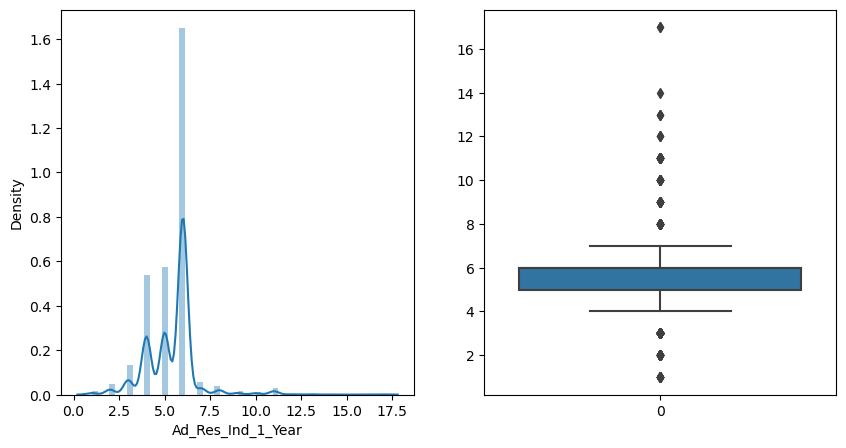

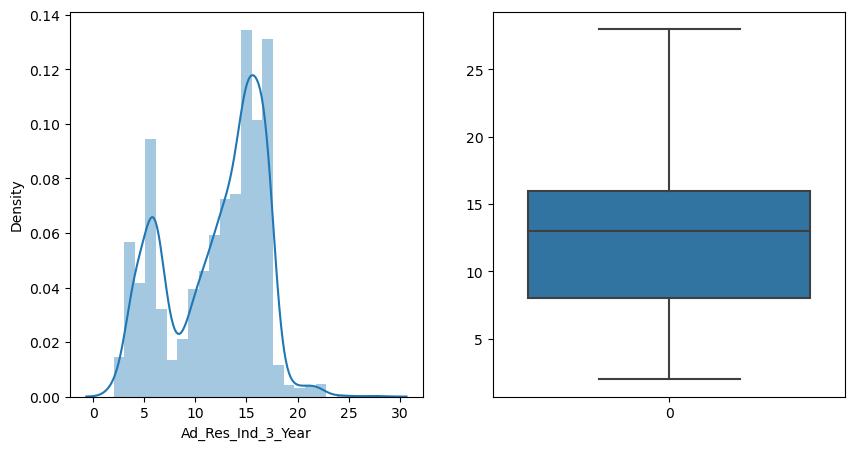

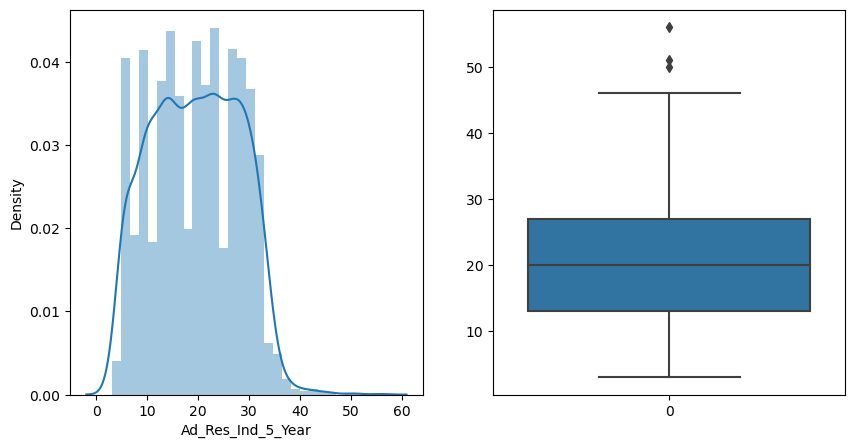

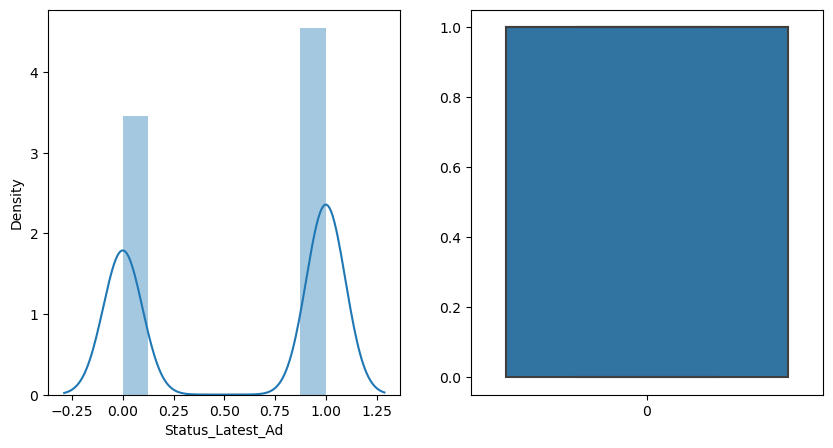

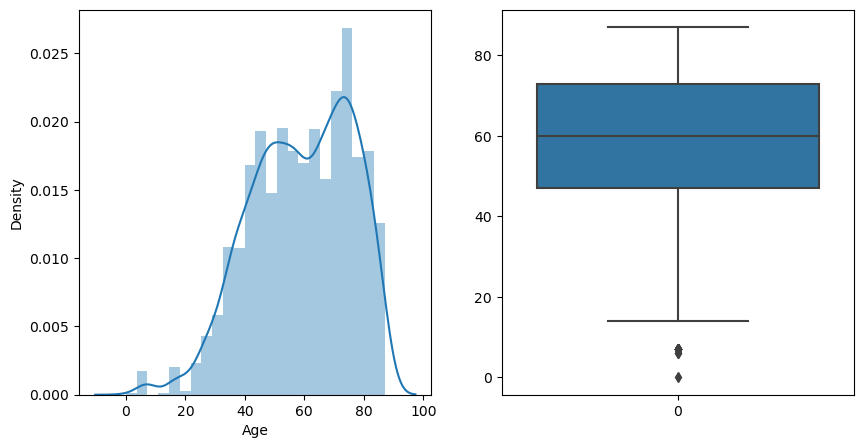

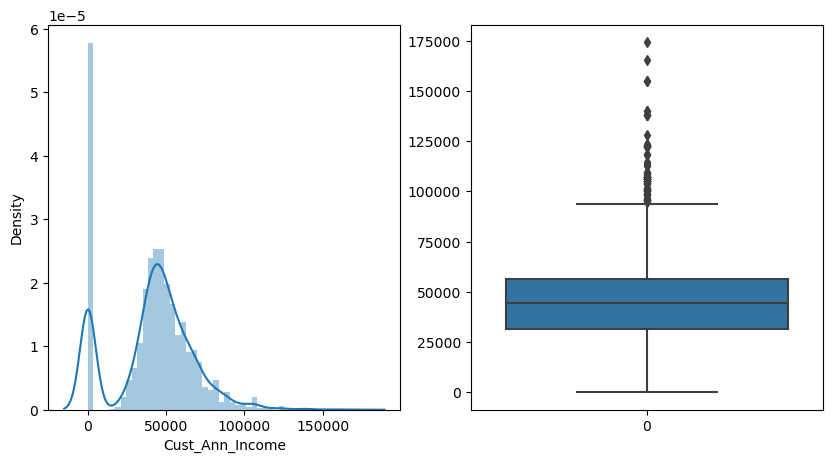

In [26]:
for col in NumCols:
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    sns.distplot(data[col], ax=ax[0])
    sns.boxplot(data[col], ax=ax[1])
    plt.show()

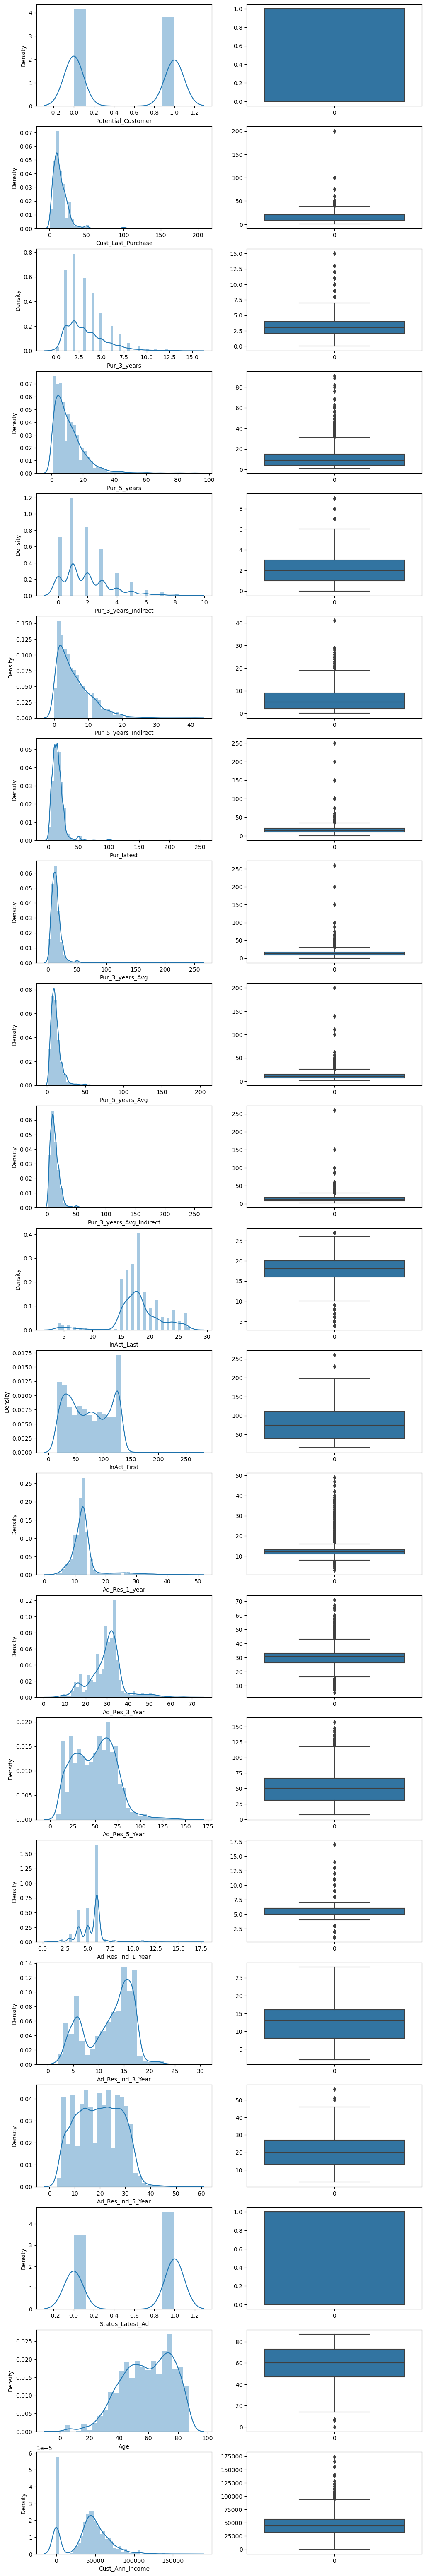

In [27]:
fig, ax = plt.subplots(nrows=len(NumCols), ncols=2, figsize=(12, 80))

for i in range (len(NumCols)) :
    sns.distplot(data[NumCols[i]], ax=ax[i,0])
    sns.boxplot(data[NumCols[i]], ax=ax[i,1]);


## 3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation

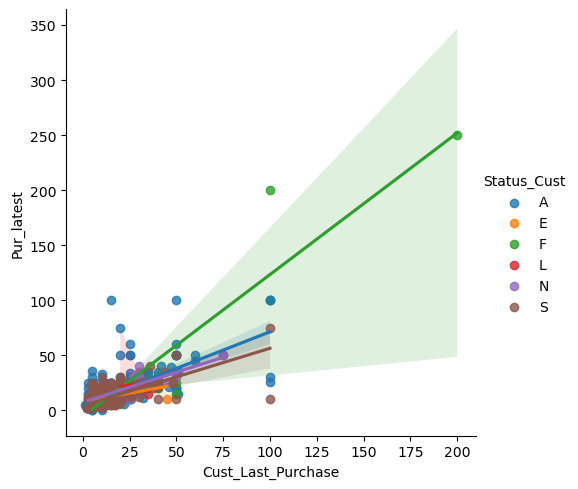

In [28]:
sns.lmplot(x='Cust_Last_Purchase', y='Pur_latest', data=data, hue='Status_Cust')
plt.show()

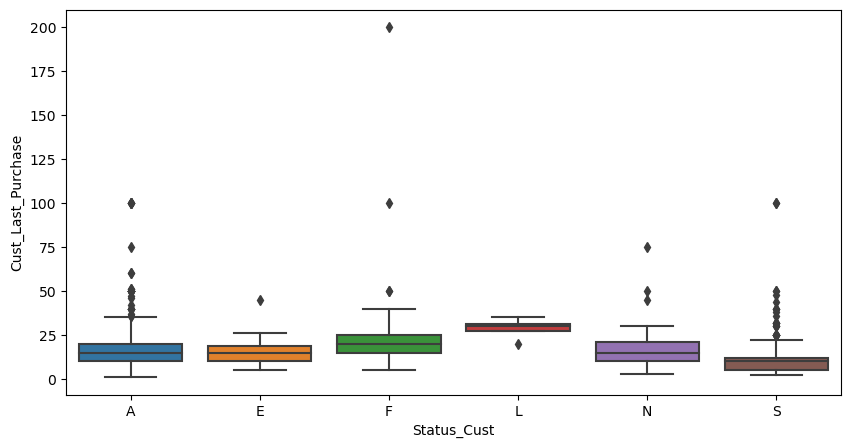

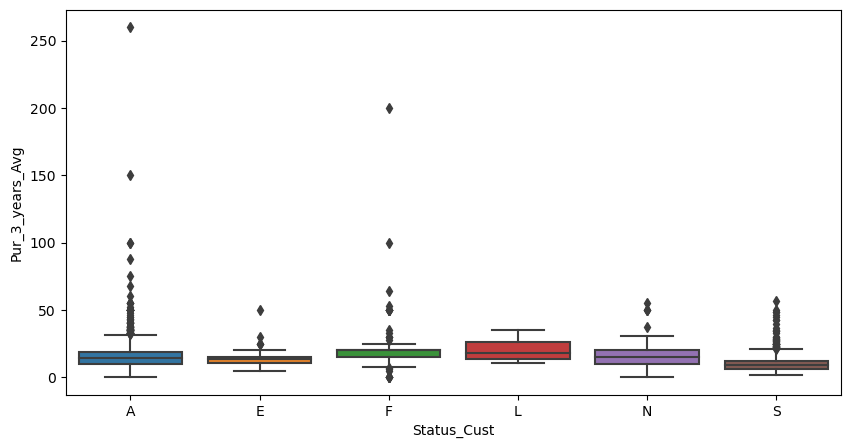

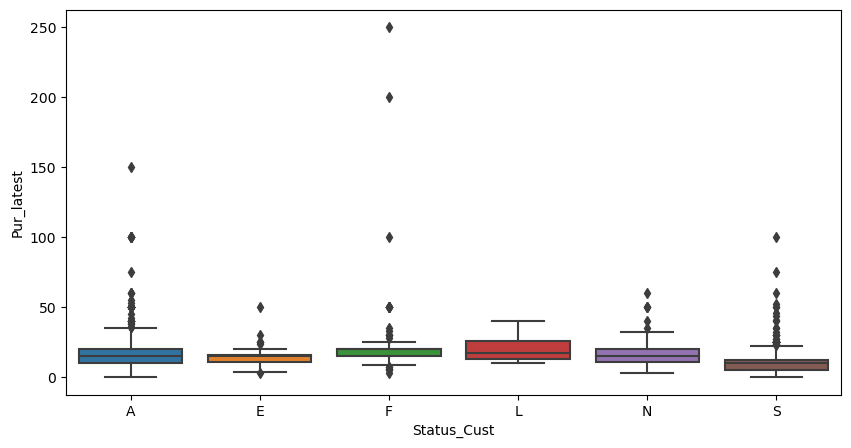

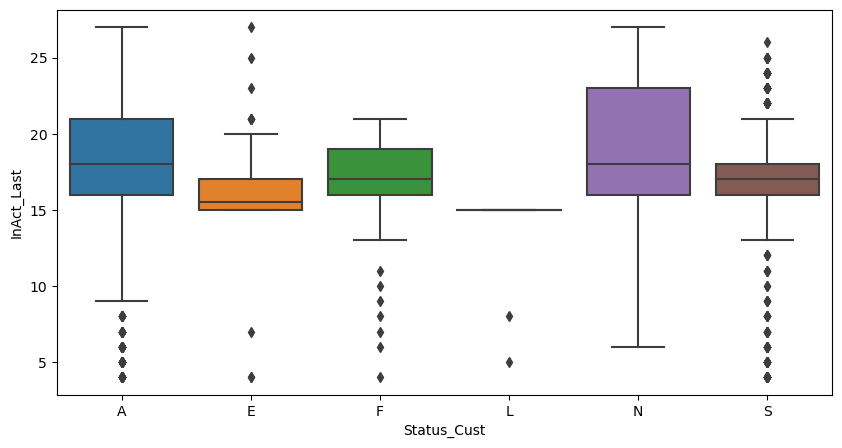

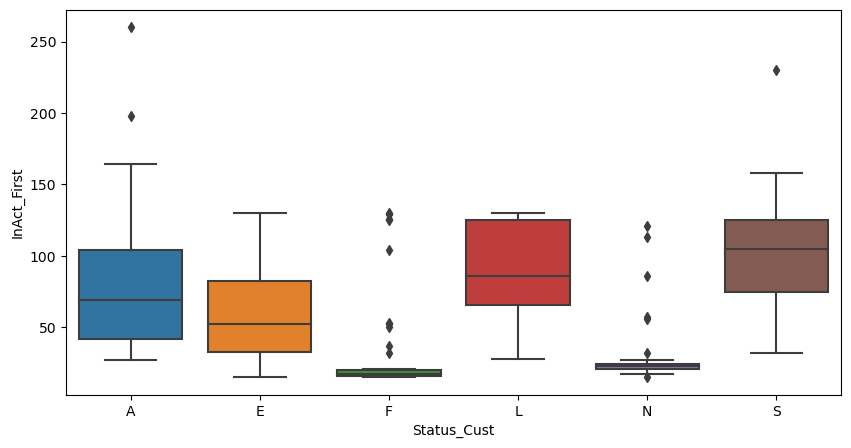

In [29]:
# Define the numerical columns to explore
num_cols = ['Cust_Last_Purchase', 'Pur_3_years_Avg', 'Pur_latest', 'InAct_Last', 'InAct_First']

# Plot the relationship between numerical columns and the target variable
for col in num_cols:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(x='Status_Cust', y=col, data=data)
    plt.show()


## 3.5 Explore the Relationship between the columns and try to answer the following questions:

1. Is there any significant difference between men/women's salary?

2. Is there any significant difference between men/women's number of the purchase in the last three years?

3. Is there any significant difference between men/women's average purchase in the last three years?

4. Is there any significant difference between men/women's total purchase in the last three years?

5. (optional) You can explore more about the relationships between the columns, if you believe the insight will improve some dicisions in this company. For instance, sending advertisements to customers regarding gender, customer status, etc.

In [101]:
#1. Is there any significant difference between men/women's salary?

import scipy.stats as stats

men_salary = data[data['Gender']=='M']['Cust_Ann_Income']
women_salary = data[data['Gender']=='F']['Cust_Ann_Income']

t, p = stats.ttest_ind(men_salary, women_salary)

if p < 0.05:
    print("p_value = {}, There is a significant difference between men and women's salary".format(round(p, 3)))
else:
    print("p_value = {}, There is no significant difference between men and women's salary".format(round(p, 3)))


p_value = 0.003, There is a significant difference between men and women's salary


In [102]:
#2. Is there any significant difference between men/women's number of the purchase in the last three years?

men_purchases = data[data['Gender']=='M']['Pur_3_years']
women_purchases = data[data['Gender']=='F']['Pur_3_years']

t, p = stats.ttest_ind(men_purchases, women_purchases)


if p < 0.05:
    print("p_value = {}, There is a significant difference between men and women's number of purchases in the last three years".format(round(p, 3)))
else:
    print("p_value = {}, There is no significant difference between men and women's number of purchases in the last three years".format(round(p, 3)))


p_value = 0.053, There is no significant difference between men and women's number of purchases in the last three years


In [103]:
#3. Is there any significant difference between men/women's average purchase in the last three years?

men_avg_purchase = data[data['Gender']=='M']['Pur_3_years_Avg']
women_avg_purchase = data[data['Gender']=='F']['Pur_3_years_Avg']

t, p = stats.ttest_ind(men_avg_purchase, women_avg_purchase)


if p < 0.05:
    print("p_value = {}, There is a significant difference between men and women's average purchase amount in the last three years".format(round(p, 3)))
else:
    print("p_value = {}, There is no significant difference between men and women's average purchase amount in the last three years".format(round(p, 3)))


p_value = 0.029, There is a significant difference between men and women's average purchase amount in the last three years


In [104]:
#4. Is there any significant difference between men/women's total purchase in the last three years?

men_total_purchase = data[data['Gender']=='M']['Pur_3_years']*data[data['Gender']=='M']['Pur_3_years_Avg']
women_total_purchase = data[data['Gender']=='F']['Pur_3_years']*data[data['Gender']=='F']['Pur_3_years_Avg']

t, p = stats.ttest_ind(men_total_purchase, women_total_purchase)

if p < 0.05:
    print("p_value = {}, There is a significant difference between men and women's total purchase amount in the last three years".format(round(p, 3)))
else:
    print("p_value = {}, There is no significant difference between men and women's total purchase amount in the last three years".format(round(p, 3)))


p_value = 0.334, There is no significant difference between men and women's total purchase amount in the last three years


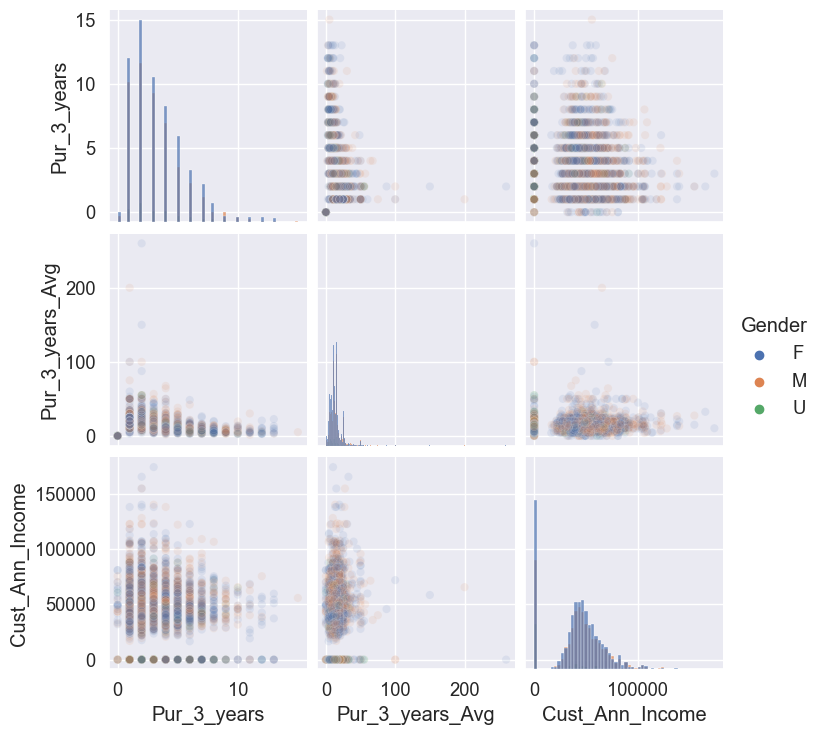

In [105]:
#5. Plot the relationships

import seaborn as sns

sns.pairplot(data, vars=['Pur_3_years', 'Pur_3_years_Avg', 'Cust_Ann_Income'], hue='Gender', diag_kind='hist', diag_kws={'alpha': 0.7}, plot_kws={'alpha': 0.1})


# 4. Feature Enginearing

## 4.1 Add Some High Level Features and explore their relationship with the target variable

Sometimes we can use high level features that reflect the interactions between the columns as new features to get better insight and feed more information to our predictive models. Also transformation of some columns can be better options to be fed to the models. For instance, instead of a numerical column, you can use log of the column, square of the column, or any other transformation of the column. The type of interaction, or transformation you should choose, can be defined after Exploratory data analysis or just business insight.

**Example:** Instead of two variables for the number of purchase, and the average amount of purchase, we could calculate the total amount of purchase for the customers. 

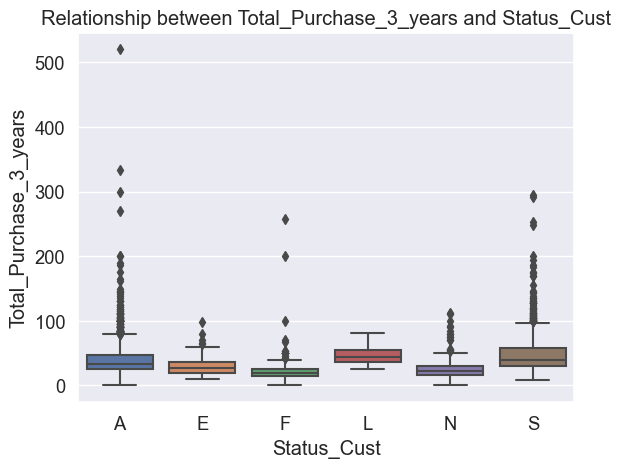

In [106]:
# Create new feature
data['Total_Purchase_3_years'] = data['Pur_3_years'] * data['Pur_3_years_Avg']

# Plot relationship with target variable
sns.boxplot(x='Status_Cust', y='Total_Purchase_3_years', data=data)
plt.title('Relationship between Total_Purchase_3_years and Status_Cust')
plt.show()


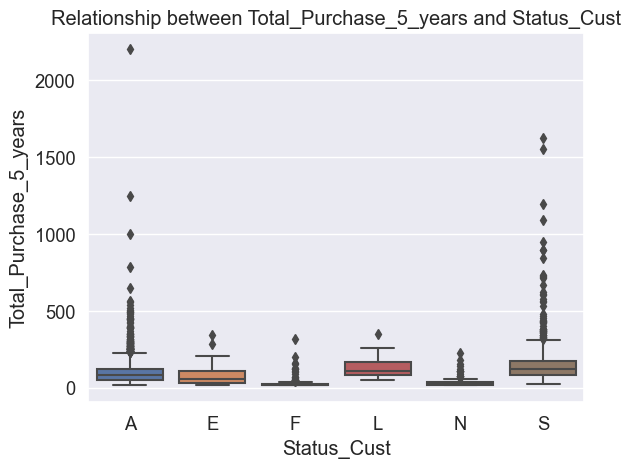

In [107]:
# Create new feature
data['Total_Purchase_5_years'] = data['Pur_5_years'] * data['Pur_5_years_Avg']

# Plot relationship with target variable
sns.boxplot(x='Status_Cust', y='Total_Purchase_5_years', data=data)
plt.title('Relationship between Total_Purchase_5_years and Status_Cust')
plt.show()

## 4.2 Check Correlation between Numerical Variables

<AxesSubplot: >

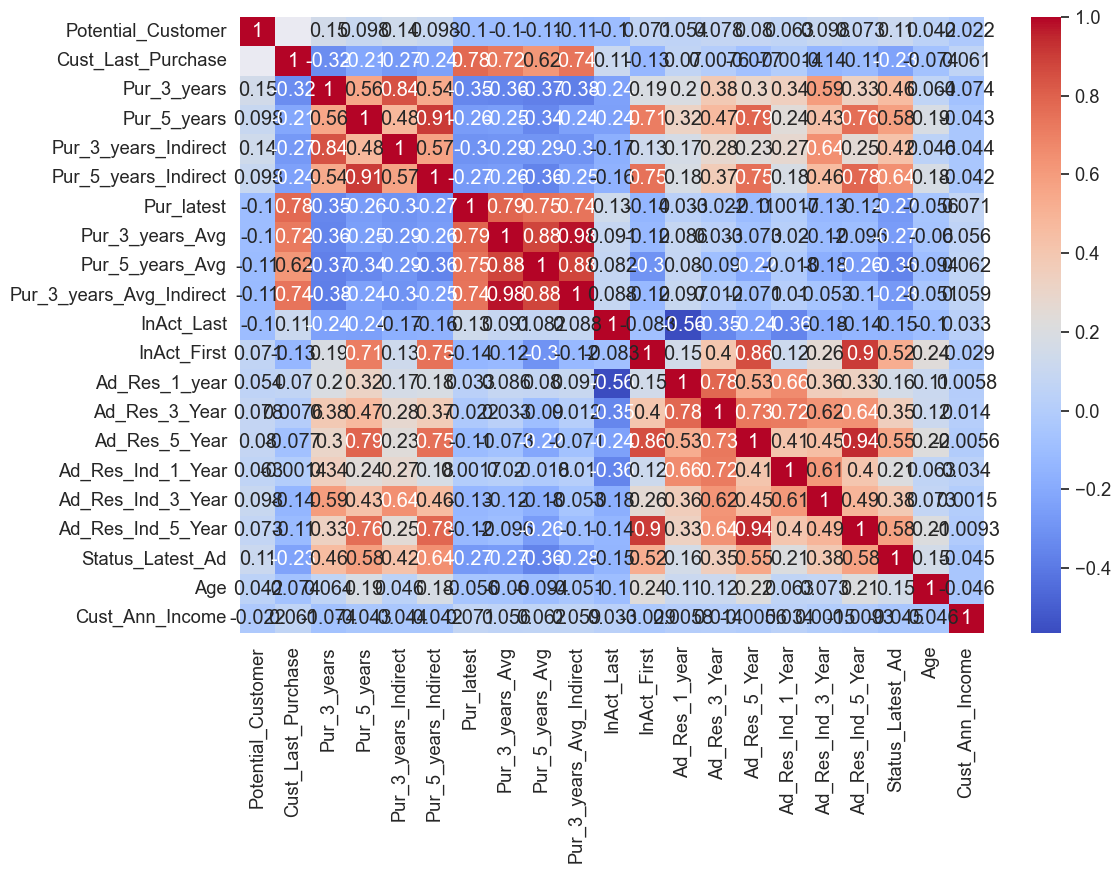

In [108]:
import seaborn as sns

corr = data[NumCols].corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data[NumCols].corr(), annot=True, cmap='coolwarm', ax=ax)

# 5. Feature Selection

It is better we do not have numerical columns with high correlations as they confuse the machine learning algorithms. We can manually remove the highly-correlated features, or we can let the PCA handles that during the pre-processing.

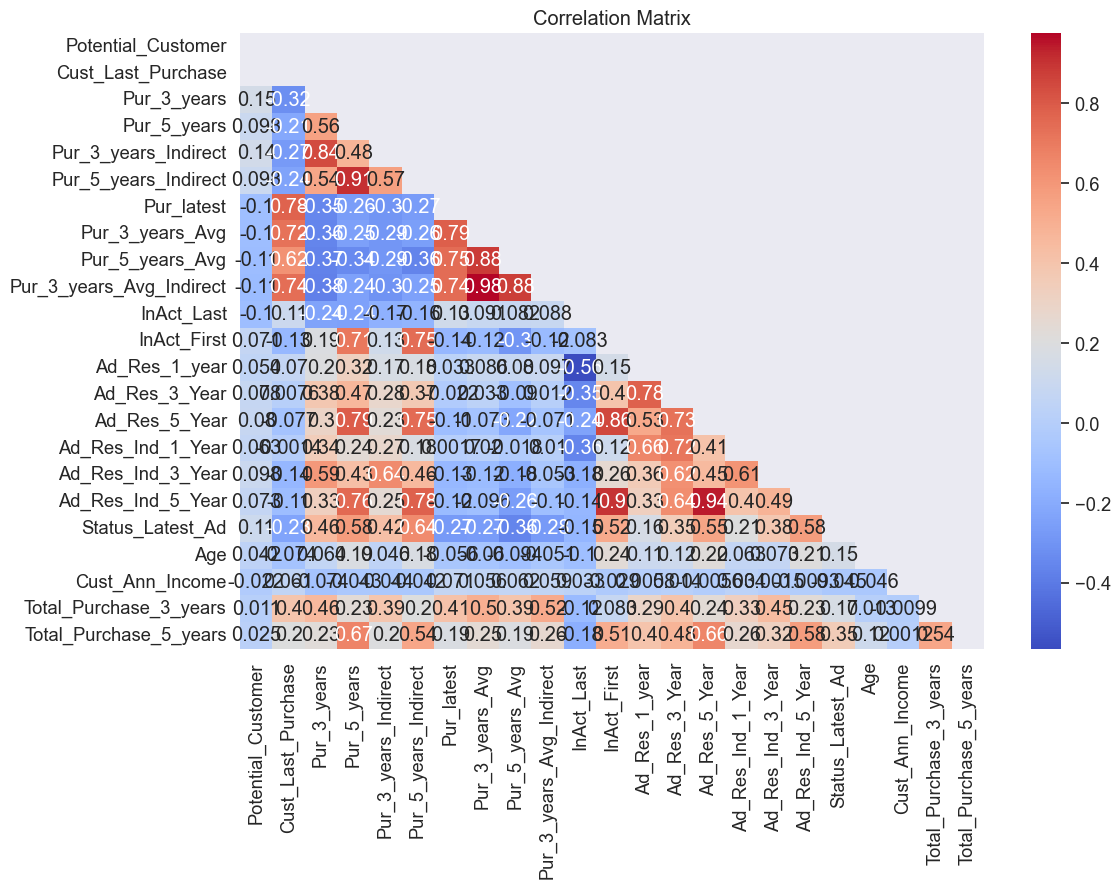

In [109]:
# Create a correlation matrix
corr_matrix = data.corr()

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap of the correlation matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 6. Data PreProcessing

## 6.1 Check the Data for Missing Values
**Hint:**
1. Check which columns have missing values

2. Create a list of the name of the columns that have missing values
    `null_columns=data.columns[data.isnull().any()]`
   
3. Decide how you should handle the missing values for each column:

    a. For some numerical columns missing value simply means 0.
    b. We can fill missing values in a numerical column by replacing mean of the column, if the column is not skewed. If the column is skewed, median might be a better option.

In [110]:
# Check which columns have missing values
null_columns = data.columns[data.isnull().any()]

# Print the columns with missing values
print(f"Columns with missing values: {null_columns}")

Columns with missing values: Index(['Cust_Last_Purchase', 'Pur_3_years_Avg_Indirect', 'Age'], dtype='object')


In [111]:
# Fill missing values for numerical columns
for col in data.select_dtypes(include='number').columns:
    if data[col].isnull().sum() > 0:
        if data[col].skew() < 1:
            data[col].fillna(data[col].mean(), inplace=True)
        else:
            data[col].fillna(data[col].median(), inplace=True)

## 6.2 Separate X (features) and y (target)

**Attention:** Don't forget to exclude the column `Cust_Last_Purchase` from your analysis

In [112]:
X = data.drop(['Cust_Last_Purchase'], axis=1)
y = data['Potential_Customer']


In [113]:
X.head()

,Potential_Customer,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,...,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Total_Purchase_3_years,Total_Purchase_5_years
0,1.0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.50,14.0,...,12.0,16.0,A,0.0,71.0,F,H,65957.0,15.00,131.92
1,1.0,1.0,7.0,0.0,3.0,25.0,25.00,13.00,11.67,18.0,...,6.0,22.0,A,1.0,7.0,M,U,0.0,25.00,91.00
2,0.0,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,19.0,...,17.0,22.0,S,1.0,79.0,F,U,0.0,75.00,135.00
3,1.0,1.0,11.0,0.0,3.0,20.0,20.00,12.45,11.67,5.0,...,8.0,33.0,A,0.0,73.0,F,U,76293.0,20.00,136.95
4,1.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,17.0,...,12.0,24.0,S,1.0,68.0,F,H,113663.0,12.99,57.00


In [114]:
y.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: Potential_Customer, dtype: float64

## 6.3 Split data to train/test 

Define X and y and split the data into 75/25 train/test set. Use random_state=42 and stratify=y

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)

In [116]:
X_train.head()

,Potential_Customer,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,...,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Total_Purchase_3_years,Total_Purchase_5_years
3151,1.0,4.0,29.0,2.0,9.0,6.0,7.50,5.45,7.0,4.0,...,15.0,22.0,S,1.0,86.0,F,U,55681.0,30.00,158.05
1698,1.0,5.0,22.0,4.0,13.0,8.0,8.60,6.82,8.5,9.0,...,18.0,27.0,S,1.0,63.0,F,H,39313.0,43.00,150.04
2327,1.0,5.0,8.0,2.0,3.0,10.0,9.60,8.00,10.5,17.0,...,16.0,16.0,A,0.0,44.0,M,H,64119.0,48.00,64.00
721,1.0,6.0,7.0,3.0,3.0,5.0,2.67,2.57,3.0,17.0,...,12.0,10.0,A,1.0,40.0,F,H,49122.0,16.02,17.99
811,1.0,3.0,15.0,2.0,9.0,10.0,11.33,9.60,12.0,18.0,...,14.0,30.0,S,1.0,71.0,M,H,47917.0,33.99,144.00


In [117]:
y_train.head()

3151    1.0
1698    1.0
2327    1.0
721     1.0
811     1.0
Name: Potential_Customer, dtype: float64

In [118]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2713, 25)
(2713,)
(905, 25)
(905,)


## 6.4 Dummy Variables
Change categorical variables with numerical variabels

In [121]:
X=pd.get_dummies(X, drop_first=True)
X

,Potential_Customer,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,...,Total_Purchase_3_years,Total_Purchase_5_years,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Gender_M,Gender_U,Cust_Prop_U
0,1.0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.50,14.0,...,15.00,131.92,0,0,0,0,0,0,0,0
1,1.0,1.0,7.0,0.0,3.0,25.0,25.00,13.00,11.67,18.0,...,25.00,91.00,0,0,0,0,0,1,0,1
2,0.0,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,19.0,...,75.00,135.00,0,0,0,0,1,0,0,1
3,1.0,1.0,11.0,0.0,3.0,20.0,20.00,12.45,11.67,5.0,...,20.00,136.95,0,0,0,0,0,0,0,1
4,1.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,17.0,...,12.99,57.00,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,1.0,2.0,6.0,0.0,1.0,20.0,16.50,13.33,11.67,19.0,...,33.00,79.98,0,0,0,0,0,0,0,0
3614,0.0,7.0,31.0,4.0,21.0,13.0,12.71,10.94,13.25,17.0,...,88.97,339.14,0,0,0,0,1,0,0,0
3615,0.0,7.0,13.0,6.0,8.0,3.0,12.43,10.62,12.50,4.0,...,87.01,138.06,0,0,0,0,0,1,0,1
3616,0.0,1.0,11.0,1.0,7.0,20.0,20.00,16.55,20.00,24.0,...,20.00,182.05,0,0,0,0,0,1,0,0


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)

## 6.5 Feature Scaling

In [122]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Xtrain_scaled, Xtest_scaled, ytrain_scaled, ytest_scaled = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

## 6.6 PCA on Numerical Columns only

1. Save the above scaled train and test data, as dataframe with proper column names
`X_train_sc=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)`
2. Separate train and test data for numerical columns only
`train_PCA=X_train_sc[NewNumCols]`, `test_PCA=X_test_sc[NewNumCols]`
3. Define the number of components on `train_PCA`
4. Fit PCA on `train_PCA` 
5. Transform `train_PCA` and `test_PCA` save it as `PCA_train` and `PCA_test`, and save them as DataFrame. Use `PCA_train.index=X_train.index` to make sure `PCA_train` have the same index with `X_train` because we need to concat this data to the dummy variables. Do the same on `PCA_test`
6. Concat `PCA_train` to the dummy variables in `X_train` save it as `X_train_pca`
7. Concat `PCA_test` to the dummy variables in `X_test` save it as `X_train_pca`

In [123]:
from sklearn.decomposition import PCA

# Save the scaled train and test data with proper column names
X_train_sc = pd.DataFrame(scaler.transform(Xtrain_scaled), columns=Xtrain_scaled.columns)
X_test_sc = pd.DataFrame(scaler.transform(Xtest_scaled), columns=Xtest_scaled.columns)


In [124]:
NewNumCols = list(data.drop(['Cust_Last_Purchase', 'Potential_Customer'], axis=1).select_dtypes(include=['float64', 'int64']).columns)


In [125]:
# Separate train and test data for numerical columns only
train_PCA = X_train_sc[NewNumCols]
test_PCA = X_test_sc[NewNumCols]


In [126]:
# Define the number of components on train_PCA
n_components = 5

In [128]:
# Fit PCA on train_PCA
pca = PCA(n_components=n_components, random_state=42)
pca.fit(train_PCA)

PCA(n_components=5, random_state=42)

In [130]:
# Transform train_PCA and test_PCA
PCA_train = pd.DataFrame(pca.transform(train_PCA), columns=['PC{}'.format(i) for i in range(1, n_components+1)])
PCA_train.index = Xtrain_scaled.index
PCA_test = pd.DataFrame(pca.transform(test_PCA), columns=['PC{}'.format(i) for i in range(1, n_components+1)])
PCA_test.index = Xtest_scaled.index

In [131]:
# Concatenate PCA_train to the dummy variables in X_train and save as X_train_pca
X_train_pca = pd.concat([Xtrain_scaled, PCA_train], axis=1)

# Concatenate PCA_test to the dummy variables in X_test and save as X_test_pca
X_test_pca = pd.concat([Xtest_scaled, PCA_test], axis=1)

# 7. Objective 1: Machine Learning
    
**1. Design a predictive model to determine the potential customers who will purchase if you send the advertisement .** The target variable is `Potential_Customer`. 

    **Attention:** Because the column `Cust_Last_Purchase` relates to the target variable `Potential_Customer`, you need to exclude it from your model.


Apply various ML algorithms on the data, evaluate them after Grid Search and Cross Validation, and choose the best model.

In [132]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

svc = SVC(kernel='linear')
lr = LogisticRegression(solver='saga', multi_class='auto', max_iter=550, fit_intercept=True)
knn = KNeighborsClassifier(n_neighbors=3)
nb = GaussianNB()
dt = DecisionTreeClassifier(max_depth=80)

models = ['svc', 'lr', 'knn', 'nb', 'dt']

**********svc with PCA **********
svc with PCA: Accuracy 0.8375690607734807

svc with PCA confusion matrix: 
[[442  29]
 [118 316]]

svc with PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       0.79      0.94      0.86       471
    Potential       0.92      0.73      0.81       434

     accuracy                           0.84       905
    macro avg       0.85      0.83      0.83       905
 weighted avg       0.85      0.84      0.84       905


svc with PCA confusion matrix: 


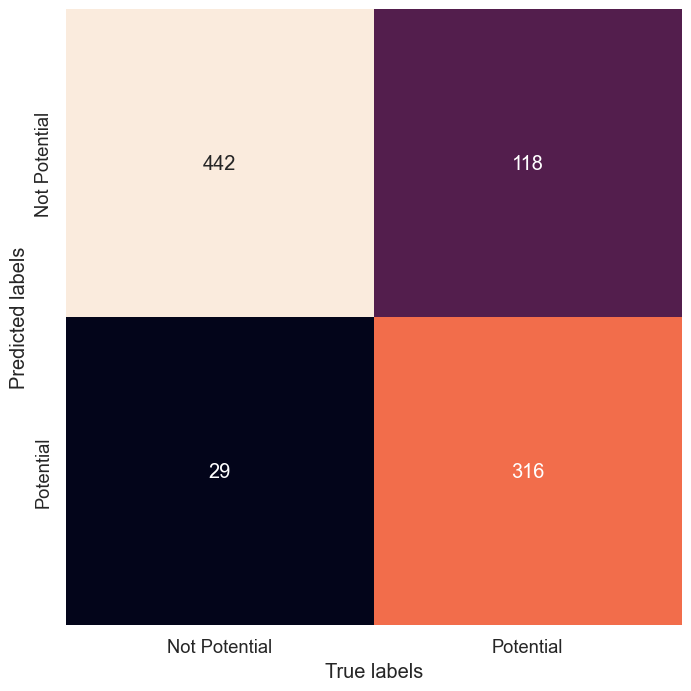

-----------------------------------------------------------------------------------------
**********svcwithout PCA **********
svc without PCA: Accuracy 0.8209944751381215

svc without PCA confusion matrix: 
[[442  29]
 [133 301]]

svc without PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       0.77      0.94      0.85       471
    Potential       0.91      0.69      0.79       434

     accuracy                           0.82       905
    macro avg       0.84      0.82      0.82       905
 weighted avg       0.84      0.82      0.82       905


svc without PCA confusion matrix: 


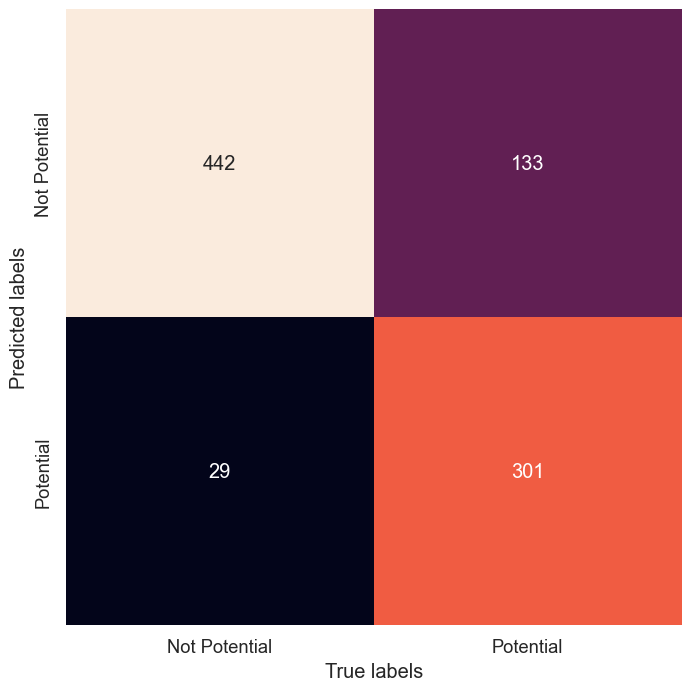

**********lr with PCA **********
lr with PCA: Accuracy 0.5337016574585636

lr with PCA confusion matrix: 
[[375  96]
 [326 108]]

lr with PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       0.53      0.80      0.64       471
    Potential       0.53      0.25      0.34       434

     accuracy                           0.53       905
    macro avg       0.53      0.52      0.49       905
 weighted avg       0.53      0.53      0.50       905


lr with PCA confusion matrix: 


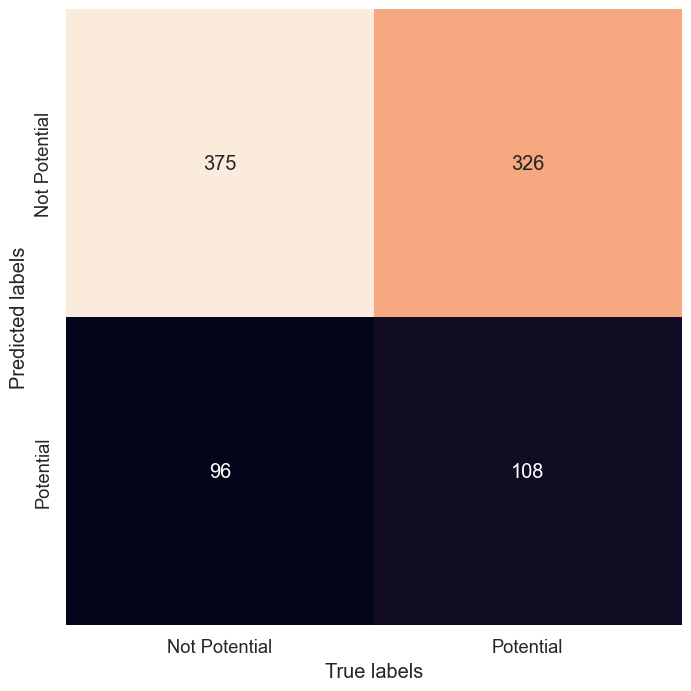

-----------------------------------------------------------------------------------------
**********lrwithout PCA **********
lr without PCA: Accuracy 0.5337016574585636

lr without PCA confusion matrix: 
[[375  96]
 [326 108]]

lr without PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       0.53      0.80      0.64       471
    Potential       0.53      0.25      0.34       434

     accuracy                           0.53       905
    macro avg       0.53      0.52      0.49       905
 weighted avg       0.53      0.53      0.50       905


lr without PCA confusion matrix: 


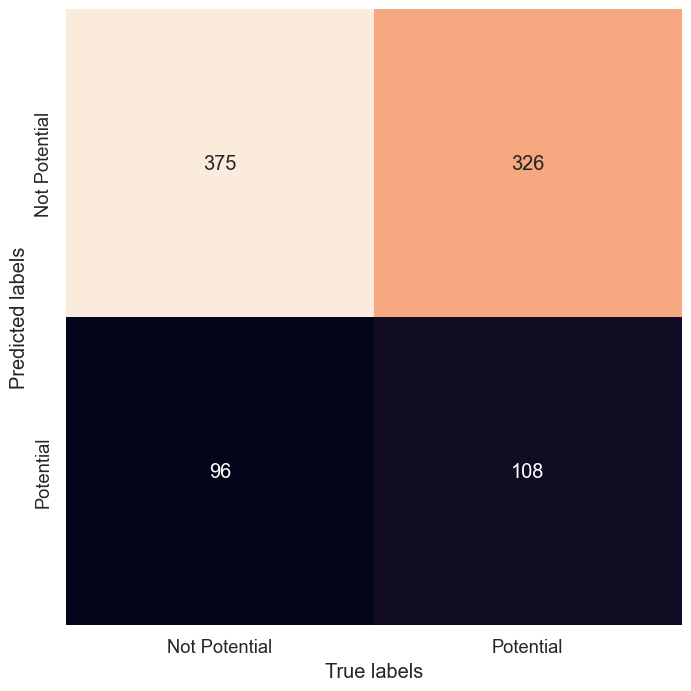

**********knn with PCA **********
knn with PCA: Accuracy 0.5093922651933702

knn with PCA confusion matrix: 
[[243 228]
 [216 218]]

knn with PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       0.53      0.52      0.52       471
    Potential       0.49      0.50      0.50       434

     accuracy                           0.51       905
    macro avg       0.51      0.51      0.51       905
 weighted avg       0.51      0.51      0.51       905


knn with PCA confusion matrix: 


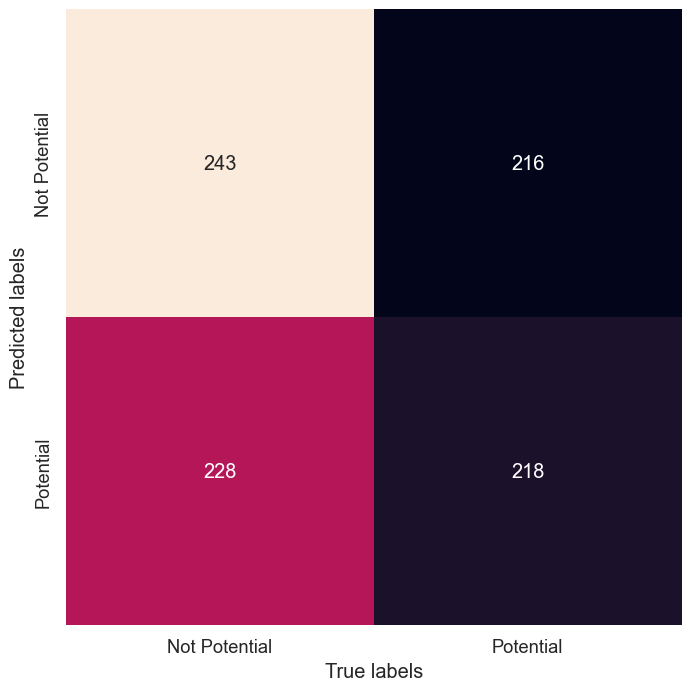

-----------------------------------------------------------------------------------------
**********knnwithout PCA **********
knn without PCA: Accuracy 0.5093922651933702

knn without PCA confusion matrix: 
[[243 228]
 [216 218]]

knn without PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       0.53      0.52      0.52       471
    Potential       0.49      0.50      0.50       434

     accuracy                           0.51       905
    macro avg       0.51      0.51      0.51       905
 weighted avg       0.51      0.51      0.51       905


knn without PCA confusion matrix: 


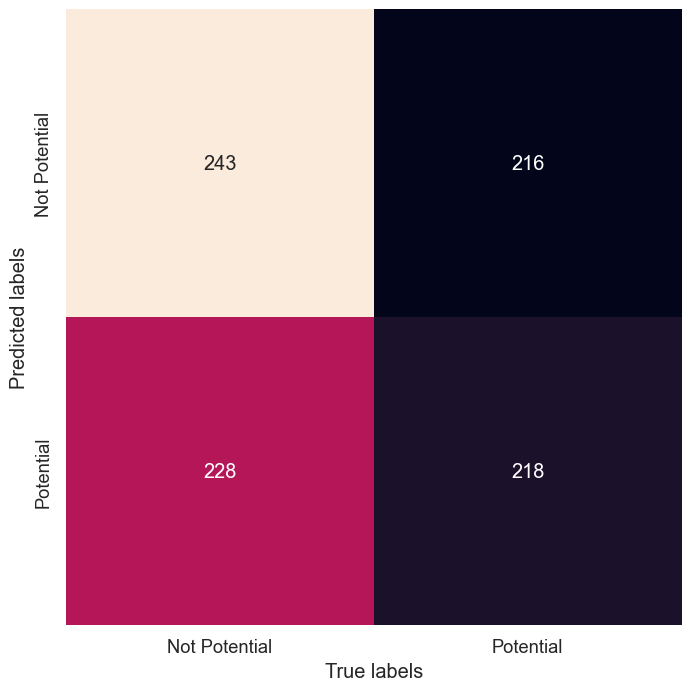

**********nb with PCA **********
nb with PCA: Accuracy 0.7071823204419889

nb with PCA confusion matrix: 
[[365 106]
 [159 275]]

nb with PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       0.70      0.77      0.73       471
    Potential       0.72      0.63      0.67       434

     accuracy                           0.71       905
    macro avg       0.71      0.70      0.70       905
 weighted avg       0.71      0.71      0.71       905


nb with PCA confusion matrix: 


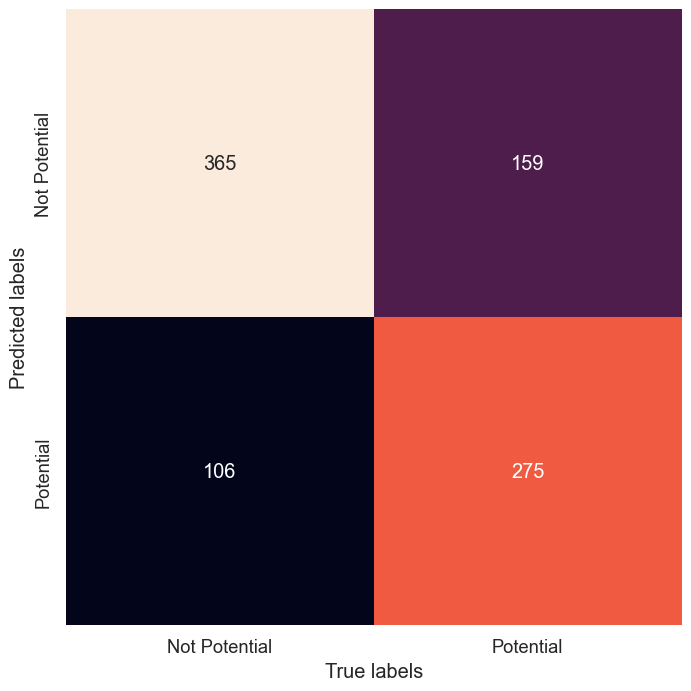

-----------------------------------------------------------------------------------------
**********nbwithout PCA **********
nb without PCA: Accuracy 0.7215469613259669

nb without PCA confusion matrix: 
[[372  99]
 [153 281]]

nb without PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       0.71      0.79      0.75       471
    Potential       0.74      0.65      0.69       434

     accuracy                           0.72       905
    macro avg       0.72      0.72      0.72       905
 weighted avg       0.72      0.72      0.72       905


nb without PCA confusion matrix: 


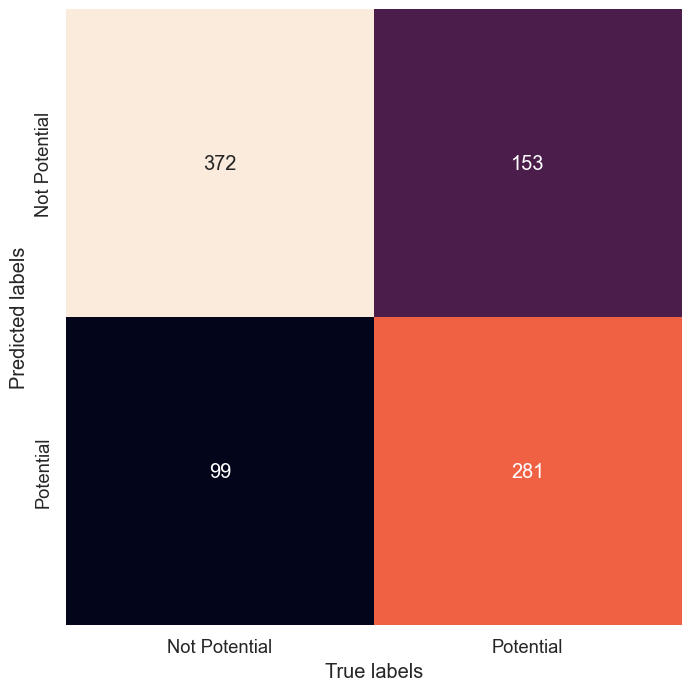

**********dt with PCA **********
dt with PCA: Accuracy 1.0

dt with PCA confusion matrix: 
[[471   0]
 [  0 434]]

dt with PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       1.00      1.00      1.00       471
    Potential       1.00      1.00      1.00       434

     accuracy                           1.00       905
    macro avg       1.00      1.00      1.00       905
 weighted avg       1.00      1.00      1.00       905


dt with PCA confusion matrix: 


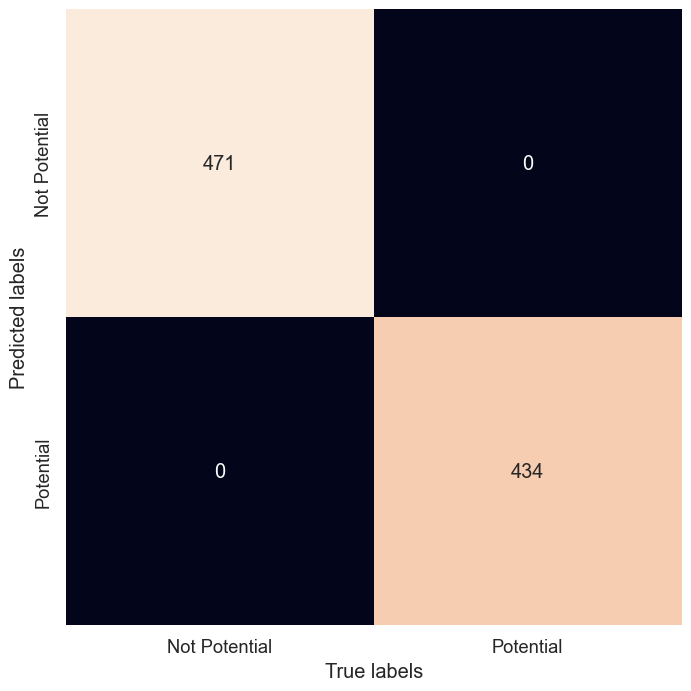

-----------------------------------------------------------------------------------------
**********dtwithout PCA **********
dt without PCA: Accuracy 1.0

dt without PCA confusion matrix: 
[[471   0]
 [  0 434]]

dt without PCA Classification Reports: 
               precision    recall  f1-score   support

Not Potential       1.00      1.00      1.00       471
    Potential       1.00      1.00      1.00       434

     accuracy                           1.00       905
    macro avg       1.00      1.00      1.00       905
 weighted avg       1.00      1.00      1.00       905


dt without PCA confusion matrix: 


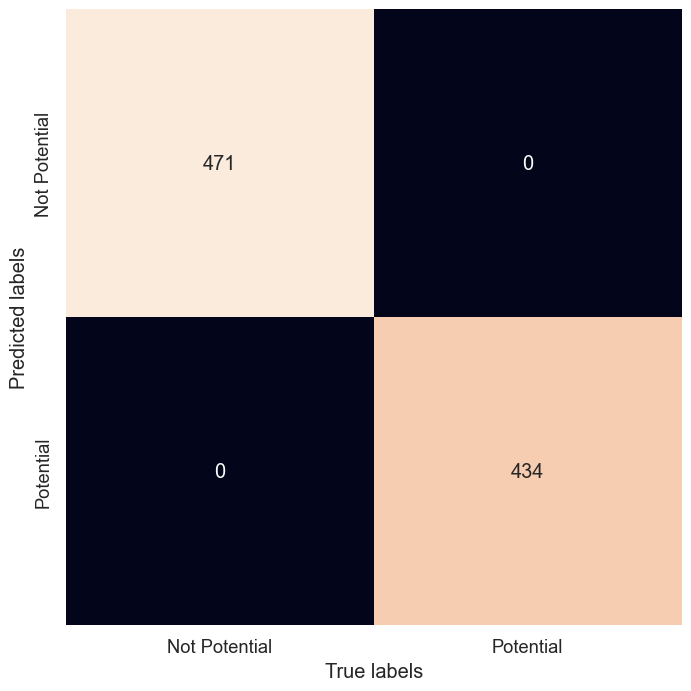

In [135]:
for i in range(len(models)):
    print('**********' + models[i] + ' with PCA **********')
    eval(models[i]).fit(X_train_pca, ytrain_scaled)
    y_pred_pca = eval(models[i]).predict(X_test_pca)
    print(models[i] + ' with PCA: Accuracy', eval(models[i]).score(X_test_pca, ytest_scaled))
    print()
    print(models[i] + ' with PCA confusion matrix: ')
    print(confusion_matrix(ytest_scaled, y_pred_pca))
    print()
    print(models[i] + ' with PCA Classification Reports: ')
    print(classification_report(ytest_scaled, y_pred_pca, target_names=['Not Potential', 'Potential']))
    print()
    print(models[i] + ' with PCA confusion matrix: ')
    mat = confusion_matrix(ytest_scaled, y_pred_pca)
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['Not Potential', 'Potential'], yticklabels=['Not Potential', 'Potential'], ax=ax)
    plt.xlabel('True labels')
    plt.ylabel('Predicted labels')
    plt.show()
    del(mat)

    print('-----------------------------------------------------------------------------------------')

    print('**********' + models[i] + 'without PCA **********')
    eval(models[i]).fit(X_train, y_train)
    y_pred = eval(models[i]).predict(X_test)
    print(models[i] + ' without PCA: Accuracy', eval(models[i]).score(X_test, y_test))
    print()
    print(models[i] + ' without PCA confusion matrix: ')
    print(confusion_matrix(y_test, y_pred))
    print()
    print(models[i] + ' without PCA Classification Reports: ')
    print(classification_report(y_test, y_pred, target_names=['Not Potential', 'Potential']))
    print()
    print(models[i] + ' without PCA confusion matrix: ')
    mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['Not Potential', 'Potential'], yticklabels=['Not Potential', 'Potential'], ax=ax)
    plt.xlabel('True labels')
    plt.ylabel('Predicted labels')
    plt.show()
    del(mat)

# 8. Objective 2

**2. Calculate the value and the revenue of your model.** Fit your model on train set. Assume amonge the customers on your test set we only send advertisement to those your model predicted as Class1 and we ignore the rest. From the data you can calculate the average `Cust_Last_Purchase` for those who are in the train set and had the last purchase (`Cust_Last_Purchase`>0) . Assume sending advertisement to each customer costs 5$ and the average purchase you calculated on the train set remains the same for the test set. Calculate the value of your models to choose the best model.

    - cost = advertisement_cost * number of the predicted positive
    - lost = average_purchase * number of the predicted negative but they have been positive
    - gain = average_purchase * number of the predicted positive and they have been positive
    - value = gain - lost - cost
    - revenue = gain - cost

Results for svc
cost : 1650
pos_pred : 330
pos_actual : 434
neg_pred_pos_actual : 29
pos_pred_pos_actual : 301
lost : 368.50559701492534
gain : 3824.8339552238804
value : 1806.3283582089553
revenue : 2174.8339552238804
precision : 0.9121212121212121
recall : 0.6935483870967742
f1 : 0.7879581151832462
accuracy : 0.8209944751381215


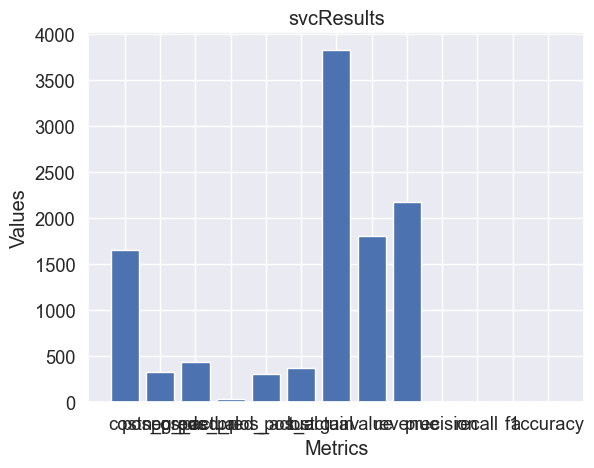

Results for lr
cost : 1020
pos_pred : 204
pos_actual : 434
neg_pred_pos_actual : 96
pos_pred_pos_actual : 108
lost : 1219.8805970149253
gain : 1372.365671641791
value : -867.5149253731342
revenue : 352.3656716417911
precision : 0.5294117647058824
recall : 0.2488479262672811
f1 : 0.3385579937304075
accuracy : 0.5337016574585636


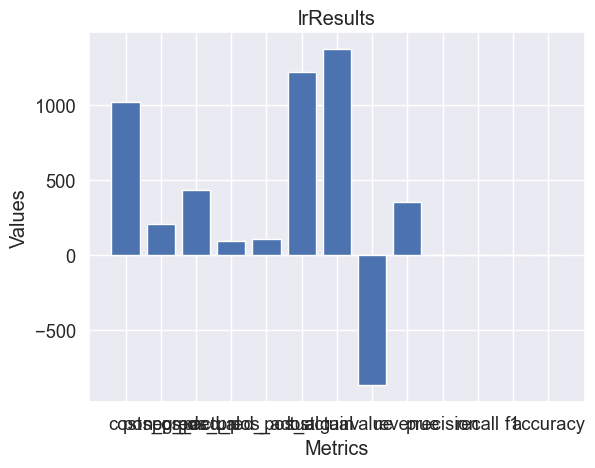

Results for knn
cost : 2230
pos_pred : 446
pos_actual : 434
neg_pred_pos_actual : 228
pos_pred_pos_actual : 218
lost : 2897.2164179104475
gain : 2770.14552238806
value : -2357.0708955223877
revenue : 540.1455223880598
precision : 0.48878923766816146
recall : 0.5023041474654378
f1 : 0.49545454545454554
accuracy : 0.5093922651933702


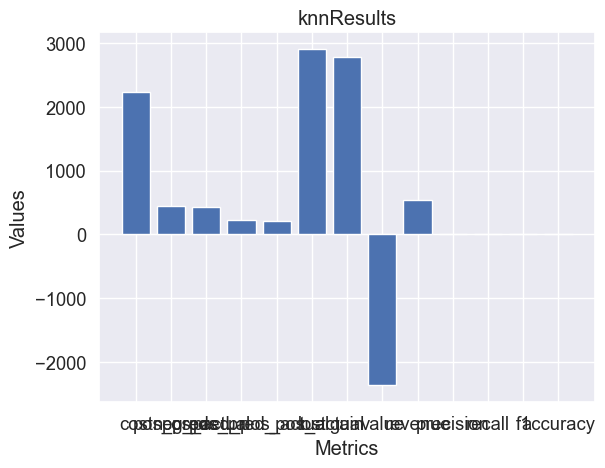

Results for nb
cost : 1900
pos_pred : 380
pos_actual : 434
neg_pred_pos_actual : 99
pos_pred_pos_actual : 281
lost : 1258.0018656716418
gain : 3570.6921641791046
value : 412.690298507463
revenue : 1670.6921641791046
precision : 0.7394736842105263
recall : 0.6474654377880185
f1 : 0.6904176904176904
accuracy : 0.7215469613259669


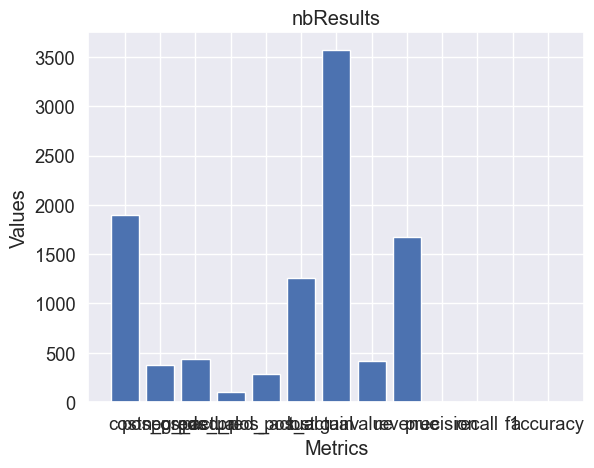

Results for dt
cost : 2170
pos_pred : 434
pos_actual : 434
neg_pred_pos_actual : 0
pos_pred_pos_actual : 434
lost : 0.0
gain : 5514.876865671642
value : 3344.876865671642
revenue : 3344.876865671642
precision : 1.0
recall : 1.0
f1 : 1.0
accuracy : 1.0


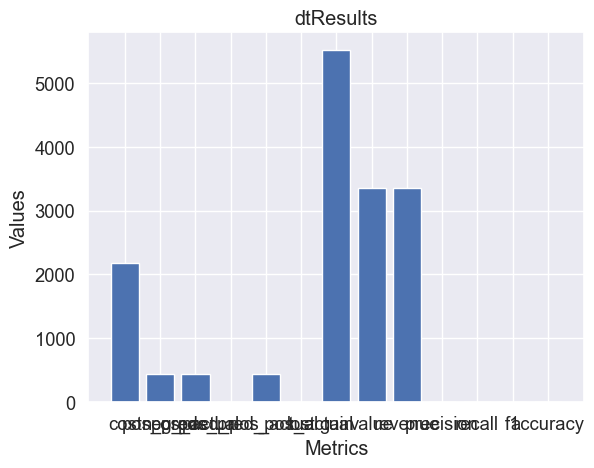

In [143]:
# Define the cost of sending advertisements to each customer
ad_cost = 5

# Get the average `Cust_Last_Purchase` for those who are in the train set and had the last purchase (`Cust_Last_Purchase`>0)
train_last_purchase = data[data['Cust_Last_Purchase'] > 0]['Cust_Last_Purchase'].mean()

# Initialize variables to store the results for each model
model_results = {}

# Fit each model on the train set and calculate the results on the test set
for i in range(len(models)):
    # Fit the model on the train set
    eval(models[i]).fit(Xtrain_scaled, ytrain_scaled)
    
    # Predict the class labels for the test set
    y_pred = eval(models[i]).predict(Xtest_scaled)
    
    # Calculate the cost of sending advertisements to customers predicted as positive
    pos_pred = sum(y_pred == 1)
    cost = ad_cost * pos_pred
    
    # Calculate the number of customers who were actually positive in the test set
    pos_actual = sum(ytest_scaled == 1)
    
    # Calculate the number of customers who were actually negative in the test set but predicted as positive by the model
    neg_pred_pos_actual = sum((y_pred == 1) & (ytest_scaled == 0))
    
    # Calculate the number of customers who were actually positive in the test set and predicted as positive by the model
    pos_pred_pos_actual = sum((y_pred == 1) & (ytest_scaled == 1))
    
    # Calculate the lost and gain from sending advertisements to the predicted positive and negative customers
    lost = train_last_purchase * neg_pred_pos_actual
    gain = train_last_purchase * pos_pred_pos_actual
    
    # Calculate the value and revenue of the model
    value = gain - lost - cost
    revenue = gain - cost

    # Calculate the classification metrics for the model
    precision = precision_score(ytest_scaled, y_pred)
    recall = recall_score(ytest_scaled, y_pred)
    f1 = f1_score(ytest_scaled, y_pred)
    accuracy = accuracy_score(ytest_scaled, y_pred)
    
    # Store the results for this model
    model_results[i] = {'cost': cost, 'pos_pred': pos_pred, 'pos_actual': pos_actual,
                                 'neg_pred_pos_actual': neg_pred_pos_actual, 'pos_pred_pos_actual': pos_pred_pos_actual,
                                 'lost': lost, 'gain': gain, 'value': value, 'revenue': revenue,
                                 'precision': precision, 'recall': recall, 'f1': f1, 'accuracy': accuracy}
    
    print('Results for '+ models[i])

    for key, value in model_results[i].items():
        print(key, ":", value)

    x = ['cost', 'pos_pred', 'pos_actual', 'neg_pred_pos_actual', 'pos_pred_pos_actual', 'lost', 'gain', 'value', 'revenue', 'precision', 'recall', 'f1', 'accuracy']
    y = [model_results[i]['cost'], model_results[i]['pos_pred'], model_results[i]['pos_actual'],
         model_results[i]['neg_pred_pos_actual'], model_results[i]['pos_pred_pos_actual'], model_results[i]['lost'], 
         model_results[i]['gain'], model_results[i]['value'], model_results[i]['revenue'],
         model_results[i]['precision'], model_results[i]['recall'], model_results[i]['f1'], model_results[i]['accuracy']]
 
    plt.bar(x, y)
    plt.title(models[i] + 'Results')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.show()


# 9. Objective 3
    
**3. Compare your best models' revenue with the revenue of the default solution which is sending advertisement to all the customers in X_test.** Which solution would you choose?

    - cost = advertisement_cost * size of the test set
    - gain = sum(Cust_Last_Purchase) on test set
    - revenue = gain - cost



In [160]:
# Calculate the cost of the default solution
default_cost = 5 * len(Xtest_scaled)

# Calculate the gain of the default solution
default_gain = sum(data['Cust_Last_Purchase'])

# Calculate the revenue of the default solution
default_revenue = default_gain - default_cost

# Print the revenue of the default solution
print('Default revenue: $', default_revenue)

# Compare the revenue of the best models with the revenue of the default solution
for model_name in model_results:
    model_revenue = model_results[model_name]['revenue']
    print(model_name, 'revenue: $', model_revenue)


Default revenue: $ 41449.25
0 revenue: $ 2174.8339552238804
1 revenue: $ 352.3656716417911
2 revenue: $ 540.1455223880598
3 revenue: $ 1670.6921641791046
4 revenue: $ 3344.876865671642


# 10. Objective 4
    
**4. Assume the next time you want to target a group of 30,000 customers simillar to this group. And assume the purchase rate is $10%$ which means 10 out of 100 people who receive the advertisement will purchase the product. Also assume your model will have the same Precision and Recall for Class1 .** Will you send the advertisement to everyone, or you use one of the models you have already created?

    - calculate your model's revenue on this set of 30,000 customers based on the above assumptions
    - calculate the revenue of the default model: send advertisement to everyone
         - cost = advertisement_cost * size of the test set
         - gain = average_purchase * purchase_rate
         - revenue = gain - cost
    
**Hint:**
    To calculate the revenue of a model for this new set of customers with different purchase rate we need to calculate the new confusion matrix given Precision and Recall for Class1 are fixed.

In [149]:
purchase_rate = 0.1
num_customers = 30000
num_purchases = int(purchase_rate * num_customers)

In [151]:
for model_name in model_results:
    # Calculate confusion matrix for the new set of customers
    tp = int(num_purchases * model_results[model_name]['precision'])
    fn = num_purchases - tp
    tn = int((num_customers - num_purchases) * (1 - model_results[model_name]['recall']))
    fp = (num_customers - num_purchases) - tn

    # Calculate cost and gain
    advertisement_cost = 0.2  # assume advertisement cost is $0.20 per customer
    cost = advertisement_cost * num_customers
    average_purchase = 50  # assume average purchase value is $50
    gain = average_purchase * num_purchases

    # Calculate revenue
    revenue = gain - cost

    # Calculate cost and gain for default model
    purchase_rate = 0.1
    cost = advertisement_cost * num_customers
    gain = average_purchase * (num_customers * purchase_rate)

    # Calculate revenue for default model
    default_revenue = gain - cost

    if revenue > default_revenue:
        print("Use the model to target customers")
    else:
        print("Send advertisement to everyone")





Send advertisement to everyone
Send advertisement to everyone
Send advertisement to everyone
Send advertisement to everyone
Send advertisement to everyone


In [175]:
average_purchase = data[data['Cust_Last_Purchase'] > 0]['Cust_Last_Purchase'].mean()

model_revenues = {}
for i in model_results:
    # Calculate the new confusion matrix
    true_positives = 0.1 * 30000 * model_results[i]['precision']
    if model_results[i]['neg_pred_pos_actual'] != 0:
        false_positives = (1 - model_results[i]['recall']) * model_results[i]['neg_pred_pos_actual'] * (30000 - true_positives) / model_results[i]['neg_pred_pos_actual']
    else:
        false_positives = 0
    confusion_matrix = [[true_positives, false_positives], [0, 0]]

    # Calculate the revenue for each model and the default solution
    default_cost = 5 * 30000
    default_gain = average_purchase * 0.1 * 30000
    default_revenue = default_gain - default_cost

    tp = model_results[i]['pos_pred_pos_actual']
    fp = model_results[i]['pos_pred'] - tp
    fn = model_results[i]['pos_actual'] - tp
    tn = model_results[i]['neg_pred_pos_actual'] - fp
    model_confusion_matrix = [[tp, fp], [fn, tn]]
    model_precision = tp / (tp + fp)
    model_recall = tp / (tp + fn)
    model_true_positives = true_positives * model_precision
    if tn != 0:
        model_false_positives = (1 - model_recall) * tn * (30000 - model_true_positives) / tn
    else:
        model_false_positives = 0
    model_confusion_matrix[0][0] = model_true_positives
    model_confusion_matrix[0][1] = model_false_positives
    model_gain = model_true_positives * average_purchase
    model_cost = 5 * (model_true_positives + model_false_positives)
    model_revenue = model_gain - model_cost
    model_revenues[i] = model_revenue
    
    print(models[i], 'revenue: $', model_revenue)
    
print('Default solution revenue: $', default_revenue)


svc revenue: $ 19236.088719625015
lr revenue: $ 6480.355575065847
knn revenue: $ 5524.016025064806
nb revenue: $ 12643.202869826764
dt revenue: $ 23121.26865671642
Default solution revenue: $ -111878.73134328358
